<img src="http://data.freehdw.com/ships-titanic-vehicles-best.jpg"  Width="800">

## <div style="text-align: center" > A Statistical Analysis & Machine Learning Workflow of Titanic </div>
<div style="text-align: center"> Being a part of Kaggle gives me unlimited access to learn, share and grow as a Data Scientist. In this kernel, I want to solve <font color="red"><b>Titanic competition</b></font>, a popular machine learning dataset for <b>beginners</b>. I am going to discuss every steps of a typical machine learning project such as,<b> from data preparation, data analysis to statistical tests and implementing different models along with explaining why we used them.</b> I will also describe the model results along with many other tips. So let's get started.</div>


***
<div style="text-align:center"> If there are any recommendations/changes you would like to see in this notebook, please <b>leave a comment</b>. Any feedback/constructive criticism would be genuinely appreciated. <b>This notebook is always a work in progress. So, please stay tuned for more to come.</b></div>


<div style="text-align:center">If you like this notebook or find this notebook helpful, Please feel free to <font color="red"><b>UPVOTE</b></font> and/or <font color="Blue"><b>leave a comment.</b></font></div><br>

<div style="text-align: center"><b>You can also Fork and Run this kernel on <a href="https://github.com/masumrumi">Github</b></a>
    </div>

### <div style="text-align: center">Stay Tuned for More to Come!!</div>




   

# Introduction
<a id="introduction" ></a><br>
This kernel is for all aspiring data scientists to learn from and to review their knowledge. We will have a detailed statistical analysis of Titanic data set along with Machine learning models. I am super excited to share my first kernel with the Kaggle community. As I go on in this journey and learn new topics, I will incorporate them with updates. So, check for them and please <b>leave a comment</b> if you have any suggestions to make them better!! Going back to the topics of this kernel, I will do more in-depth visualizations to explain the data, and the machine learning classifiers will be used to predict passenger survival status. So, let's get started.

<div style="text-align: center">This notebook goes indepth in classifier models since we are trying to solve a classifier problem here. If you want to learn more about Advanced Regression models, please check out <a href="https://www.kaggle.com/masumrumi/a-stats-analysis-and-ml-workflow-of-house-pricing">this</a> kernel.</div>


## Table of contents
***
- [Introduction](#introduction)
- [Kernel Goals](#aboutthiskernel)
- [Part 1: Importing Necessary Modules](#import_libraries)
    - [1a. Libraries](#import_libraries)
    - [1b. Load datasets](#load_data)
    - [1c. A Glimpse of the dataset](#glimpse)
    - [1d. About this dataset](#aboutthisdataset)
    - [1e. Tableau Visualization](#tableau_visualization)
- [Part 2: Overview and Cleaning the Data](#scrubbingthedata)
    - [2a. Overview](#cleaningthedata)
    - [2b. Dealing with missing values](#dealwithnullvalues)
- [Part 3: Visualization and Feature Relations](#visualization_and_feature_relations)
    - [3a. Gender and Survived](#gender_and_survived)
    - [3b. Pclass and Survived](#pclass_and_survived)
    - [3c. Fare and Survived](#fare_and_survived)
    - [3d. Age and Survived](#age_and_survived)
    - [3e. Combined Feature relations](#combined_feature_relations)
- [Part 4: Statistical Overview](#statisticaloverview)
    - [4a. Correlation Matrix and Heatmap](#heatmap)
    - [4b. Statistical Test for Correlation](#statistical_test)
    - [4c. The T-Test](#t_test)
- [Part 5: Feature Engineering](#feature_engineering)
- [Part 6: Pre-Modeling Tasks](#pre_model_tasks)
    - [6a. Separating dependent and independent variables](#dependent_independent)
    - [6b. Splitting the training data](#split_training_data)
    - [6c. Feature Scaling](#feature_scaling)
- [Part 7: Modeling the Data](#modelingthedata)
    - [7a. Logistic Regression](#logistic_regression)
    - [7b. K-Nearest Neighbors(KNN)](#knn)
    - [7c. Gaussian Naive Bayes](#gaussian_naive)
    - [7d. Support Vector Machines](#svm)
    - [7e. Decision Tree Classifier](#decision_tree)
    - [7f. Bagging on Decision Tree Classifier](#bagging_decision)
    - [7g. Random Forest Classifier](#random_forest)
    - [7h. Gradient Boosting Classifier](#gradient_boosting)
    - [7i. XGBClassifier](#XGBClassifier)
    - [7j. AdaBoost Classifier](#adaboost)
    - [7k. Extra Tree Classifier](#extra_tree)
    - [7l. Gaussian Process Classifier](#GaussianProcessClassifier)
    - [7m. Voting Classifier](#voting_classifier)
- [Part 8: Submit Test Predictions](#submit_predictions)
    
- [ Credits](#credits)

# Kernel Goals
<a id="aboutthiskernel"></a>
***
There are three primary goals of this kernel.
- <b>Do a statistical analysis</b> of how some group of people was survived more than others. 
- <b>Do an exploratory data analysis(EDA)</b> of titanic with visualizations and storytelling.  
- <b>Predict</b>: Use machine learning classification models to predict the chances of passengers survival.

P.S. If you want to learn more about regression models, try this [kernel](https://www.kaggle.com/masumrumi/a-stats-analysis-and-ml-workflow-of-house-pricing/edit/run/9585160). 

# Part 1: Importing Necessary Libraries and datasets
***
<a id="import_libraries**"></a>
## 1a. Loading libraries

Python is a fantastic language with a vibrant community that produces many amazing libraries. I am not a big fan of importing everything at once for the newcomers. So, I am going to introduce a few necessary libraries for now, and as we go on, we will keep unboxing new libraries when it seem necassary. 

In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
# Pandas is probably the most popular and important modules for any work related to data management. 
import pandas as pd

# numpy is a great library for doing mathmetical operations. 
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

## Some other snippit of codes to get the setting right 
## This is so that the chart created by matplotlib can be shown in the jupyter notebook. 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning
import os ## imporing os
print(os.listdir("./data/")) 

['gender_submission.csv', 'test.csv', 'train.csv']


## 1b. Loading Datasets
<a id="load_data"></a>
***

After loading the necessary modules, we need to import the datasets. Many of the business problems usually come with a tremendous amount of messy data. We extract those data from many sources. I am hoping to write about that in a different kernel. For now, we are going to work with a less complicated and quite popular machine learning dataset.

In [2]:
## Importing the datasets
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

You are probably wondering why two datasets? Also, Why have I named it "train" and "test"?  To explain that I am going to give you an overall picture of the supervised machine learning process. 

"Machine Learning" is simply "Machine" and "Learning". Nothing more and nothing less. In a supervised machine learning process, we are giving machine/computer/models specific inputs or data(text/number/image/audio) to learn from aka we are training the machine to learn certain thing based on the data and the output. Now, how do we know what we are teaching is what they are learning? That is where the test set comes to play. We withhold part of the data where we know the output/result of the algorithms, and we use this data to test the trained machine learning model.  We then compare the outcomes to determine machines performance. If you don't you are a bit confused thats okay. I will explain more as we keep reading. Let's take a look at the sample of the dataset.

## 1c. A Glimpse of the Datasets. 
<a id="glimpse"></a>
***

**> Sample train dataset**

In [ ]:
## Take a look at the overview of the dataset. 
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S


**> Sample test dataset**

In [9]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
387,1279,2,"Ashby, Mr. John",male,57.0,0,0,244346,13.00,NaN,S
248,1140,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26707,26.00,NaN,S
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.50,NaN,S
278,1170,2,"Ware, Mr. John James",male,30.0,1,0,CA 31352,21.00,NaN,S
380,1272,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.75,NaN,Q


This is a sample of train and test dataset. Lets find out a bit more about the train and test dataset. 

In [10]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non

 ## 1d. About This Dataset
<a id="aboutthisdataset"></a>
***
The data has split into two groups:

- training set (train.csv)
- test set (test.csv)

***The training set includes our target variable(dependent variable), passenger survival status***(also known as the ground truth from the Titanic tragedy) along with other independent features like gender, class, fare, and Pclass. 

The test set should be used to see how well our model performs on unseen data. When we say unseen data, we mean that the algorithm or machine learning models have no relation to the test data. We do not want to use any part of the test data in any way to modify our algorithms; Which are the reasons why we clean our test data and train data separately. ***The test set does not provide passengers survival status***. We are going to use our model to predict passenger survival status.

Now let's go through the features and describe a little. There is a couple of different type of variables, They are...

***
**Categorical:**
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order.)
   > - **Cabin**
   > - **Embarked**(Port of Embarkation)
            C(Cherbourg)
            Q(Queenstown) 
            S(Southampton)
        
- **Dichotomous**(Nominal variable with only two categories)
   > - **Sex**
            Female
            Male
- **Ordinal**(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)
   > - **Pclass** (A proxy for socio-economic status (SES)) 
            1(Upper)
            2(Middle) 
            3(Lower)
***
**Numeric:**
- **Discrete**
  >  - **Passenger ID**(Unique identifing # for each passenger)
  >  - **SibSp**
  >  - **Parch**
  >  - **Survived** (Our outcome or dependent variable)
            0
            1
- **Continous**
>  - **Age**
>  - **Fare**
***
**Text Variable**
> - **Ticket** (Ticket number for passenger.)
> - **Name**(  Name of the passenger.) 



## 1e. Tableau Visualization of the Data
<a id='tableau_visualization'></a>
***
I have incorporated a tableau visualization below of the training data. This visualization... 
* is for us to have an overview and play around with the dataset. 
* is done without making any changes(including Null values) to any features of the dataset.
***
Let's get a better perspective of the dataset through this visualization.


In [11]:
%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'><noscript><a href='#'><img alt='An Overview of Titanic Training Dataset ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Titanic_data_mining&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1516349898238');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

We want to see how the left bar(with green and red) changes when we filter out specific unique values of a feature. We can use multiple filters to see if there are any correlations among them. For example, if we click on **upper** and **Female** tab, we would see that green color dominates the bar with 91 survived female passengers with only 3 female passengers that did not survive; a 97% survival rate for females. While if we choose **lower** and **Female**, we would see that, there were 50% chance of females surviving. The age distribution chart on top provides us with some more info such as, what was the age range of those three unlucky females as the red color give away the unsurvived once. If you would like to check out some of my other tableau charts, please click [here.](https://public.tableau.com/profile/masum.rumi#!/)

# Part 2: Overview and Cleaning the Data
<a id="cleaningthedata"></a>
***
## 2a. Overview

Datasets in the real world are often messy, However, this dataset is almost clean. Lets analyze and see what we have here.

In [12]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId
## We will drop PassengerID and Ticket since it will be useless for our data. 
#train.drop(['PassengerId'], axis=1, inplace=True)
#test.drop(['PassengerId'], axis=1, inplace=True)

print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

It looks like, the features have unequal amount of data entries for every column and they have many different types of variables. This can happen for the following reasons...
* We may have missing values in our features.
* We may have categorical features. 
* We may have alphanumerical or/and text features. 


## 2b. Dealing with Missing values
<a id="dealwithnullvalues"></a>
***
**Missing values in *train* dataset.**

In [13]:
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


**Missing values in *test* set.**

In [14]:
total = test.isnull().sum().sort_values(ascending = False)
percent = round(test.isnull().sum().sort_values(ascending = False)/len(test)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


We see that in both **train**, and **test** dataset have missing values. Let's make an effort to fill these missing values. 

### Embarked feature
***

In [15]:
percent = pd.DataFrame(round(train.Embarked.value_counts(dropna=False, normalize=True)*100,2))
## creating a df with th
total = pd.DataFrame(train.Embarked.value_counts(dropna=False))
## concating percent and total dataframe

total.columns = ["Total"]
percent.columns = ['Percent']
pd.concat([total, percent], axis = 1)

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


It looks like there are only two null values( ~ 0.22 %) in the Embarked feature, we can replace these with the mode value "S". However, let's dig a little deeper. 

**Let's see what are those two null values**

In [16]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We may be able to solve these two missing values by looking at other independent variables of the two raws. Both passengers paid a fare of $80, are of Pclass 1 and female Sex. Let's see how the **Fare** is distributed among all **Pclass** and **Embarked** feature values

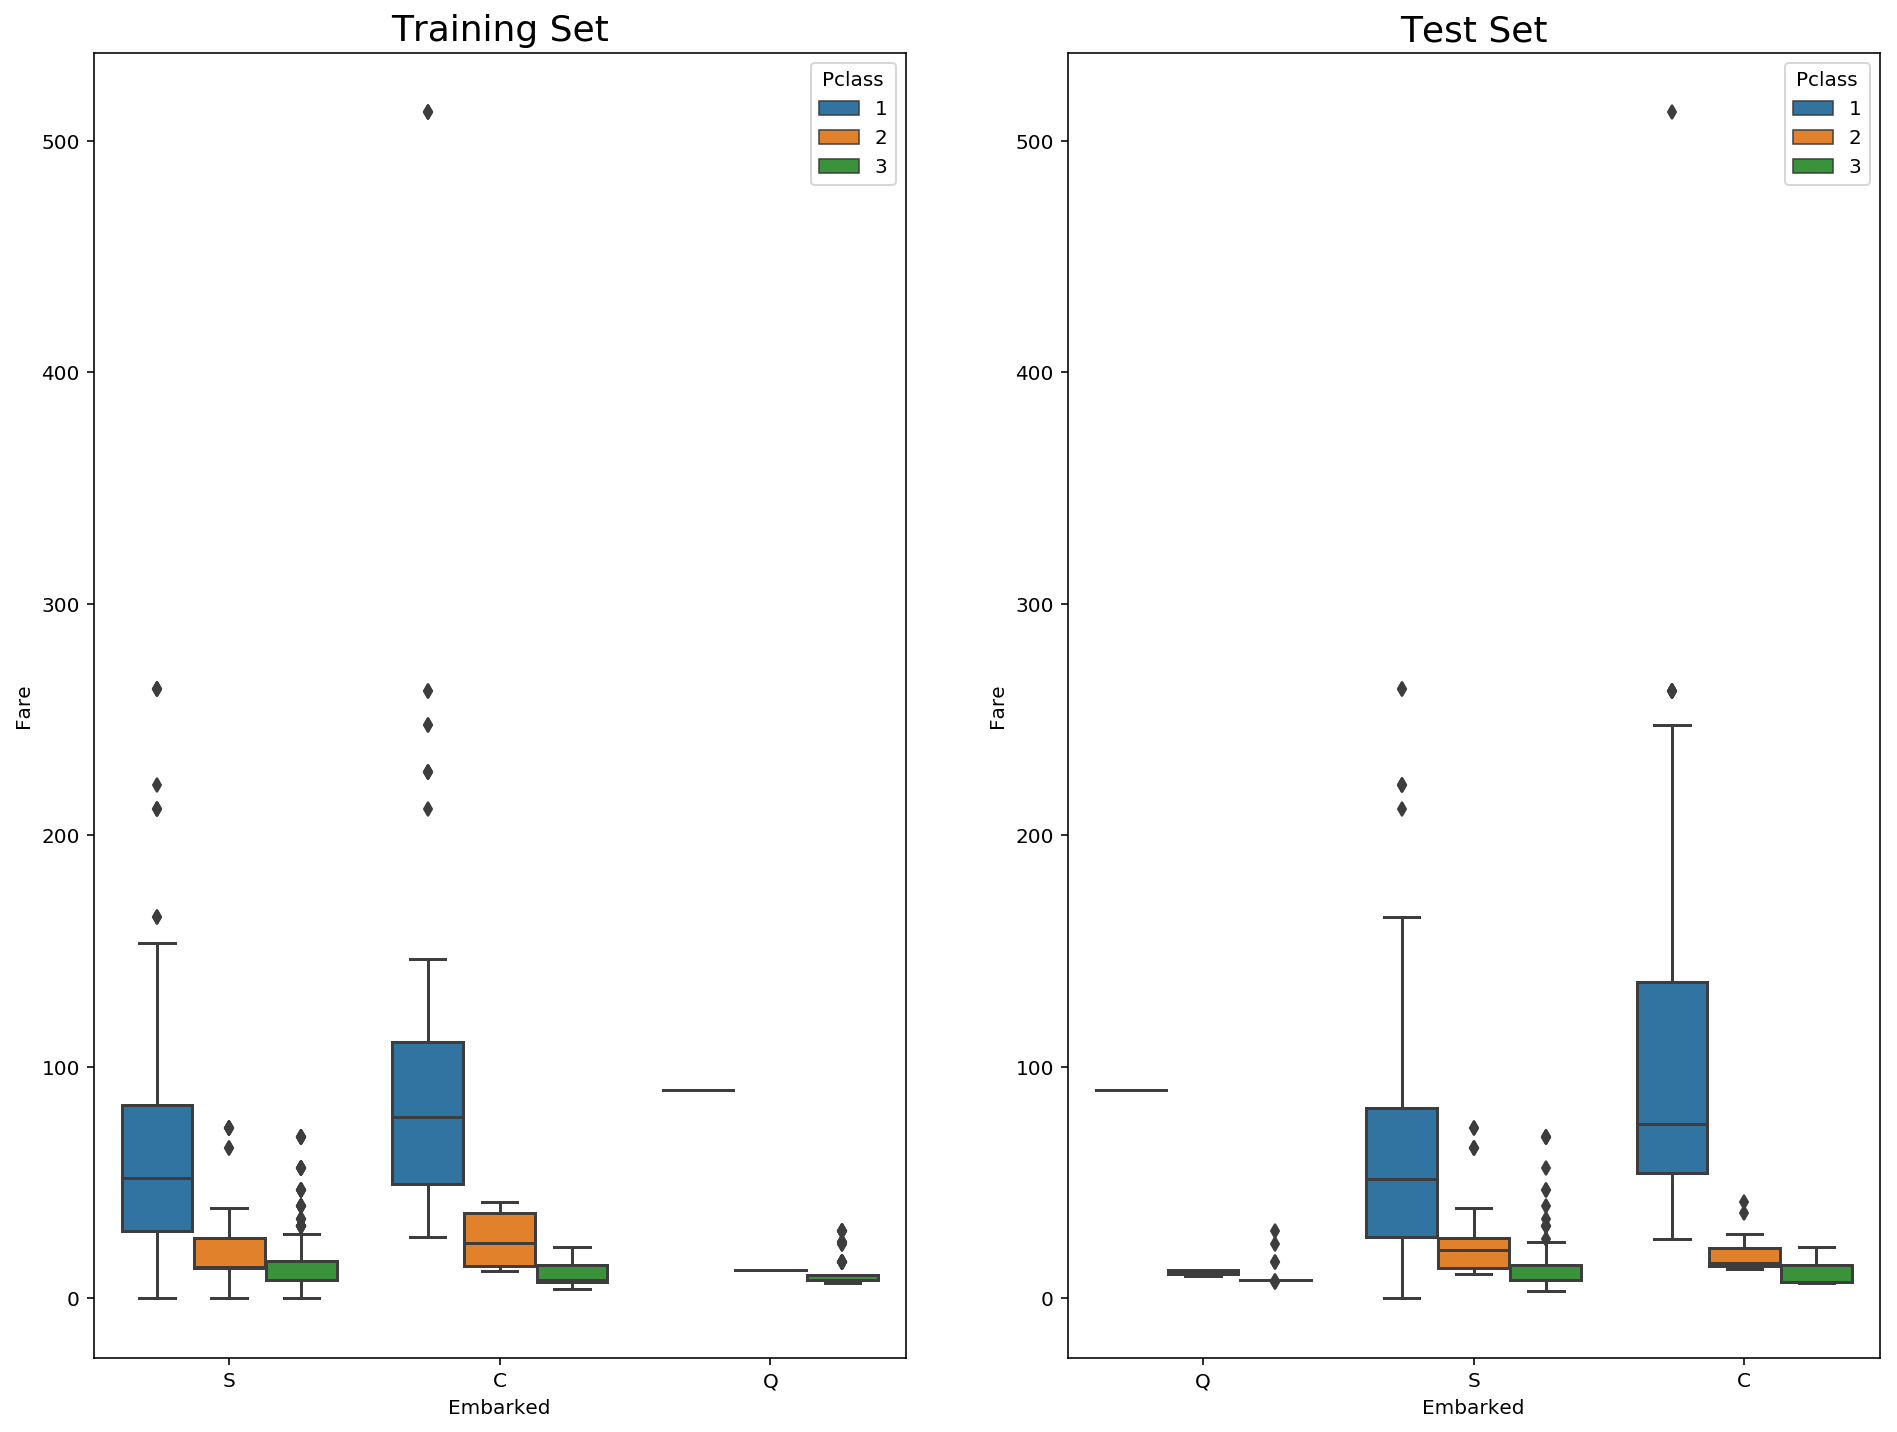

In [18]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()

Here, in both training set and test set, the average fare closest to $80 are in the <b>C</b> Embarked values. So, let's fill in the missing values as "C" 

In [19]:
## Replacing the null values in the Embarked column with the mode. 
train.Embarked.fillna("C", inplace=True)

### Cabin Feature
***

In [20]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. 
We have two choices, 
* we can either get rid of the whole feature, or 
* we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with cabin records had a higher socio-economic-status then others. We may also say passengers with cabin records were more likely to be taken into consideration when loading into the boat.

Let's combine train and test data first and for now will assign all the null values as **"N"**

In [21]:
## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

All the cabin names start with an English alphabet following by digits. It seems like there are some passengers that had booked multiple cabin rooms in their name, This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name. 

In [22]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

Now, I don't feel comfortable hanging around with 687 null values that we fakely named "N". So, let's do something about that. We can use pythons ***groupby*** function to get the mean of each cabin letter. 

In [23]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

Now, these means can help us determine the unknown cabins, if we compare each unknown cabin rows with the given mean's above. Let's write a simple function so that we can give cabin names based on the means. 

In [24]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

Let's apply <b>cabin_estimator</b> function in each unknown cabins(cabin with <b>null</b> values). Once that is done we will separate our train and test to continue towards machine learning modeling. 

In [25]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

In [26]:
## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

### Fare Feature
***

In [28]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


Here, We can take the average of the **Fare** column with all the values to fill in for Nan Fare value. However, that might not be the best way to fill in this value. We can be a little more specific and take the average of the values where**Pclass** is ***3***, **Sex** is ***male*** and **Embarked** is ***S***

In [29]:
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

### Age Feature
***

In [30]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


Some standard approaches of dealing with null values are mean, median and mode. However, we will take a different approach since **~20% data in the Age column is missing** in both train and test dataset. The age variable seems to be promising for determining survival rate. Therefore, It would be unwise to replace the missing values with median, mean or mode. We will use machine learning model Random Forest Regressor to impute missing value instead of  Null value. We will keep the age column unchanged for now and work on that in the feature engineering section. 

# Part 3. Visualization and Feature Relations
<a id="visualization_and_feature_relations" ></a>
***
Before we dive into finding relations between different features and our dependent variable(survivor) let us create some predictions about how the relations may turnout among features.

**Predictions:**
- Gender: More female survived than male
- Pclass: Higher socio-economic status passenger survived more than others. 
- Age: Younger passenger survived more than other passengers. 

Now, let's see how the features are related to each other by creating some visualizations. 



## 3a. Gender and Survived
<a id="gender_and_survived"></a>
***

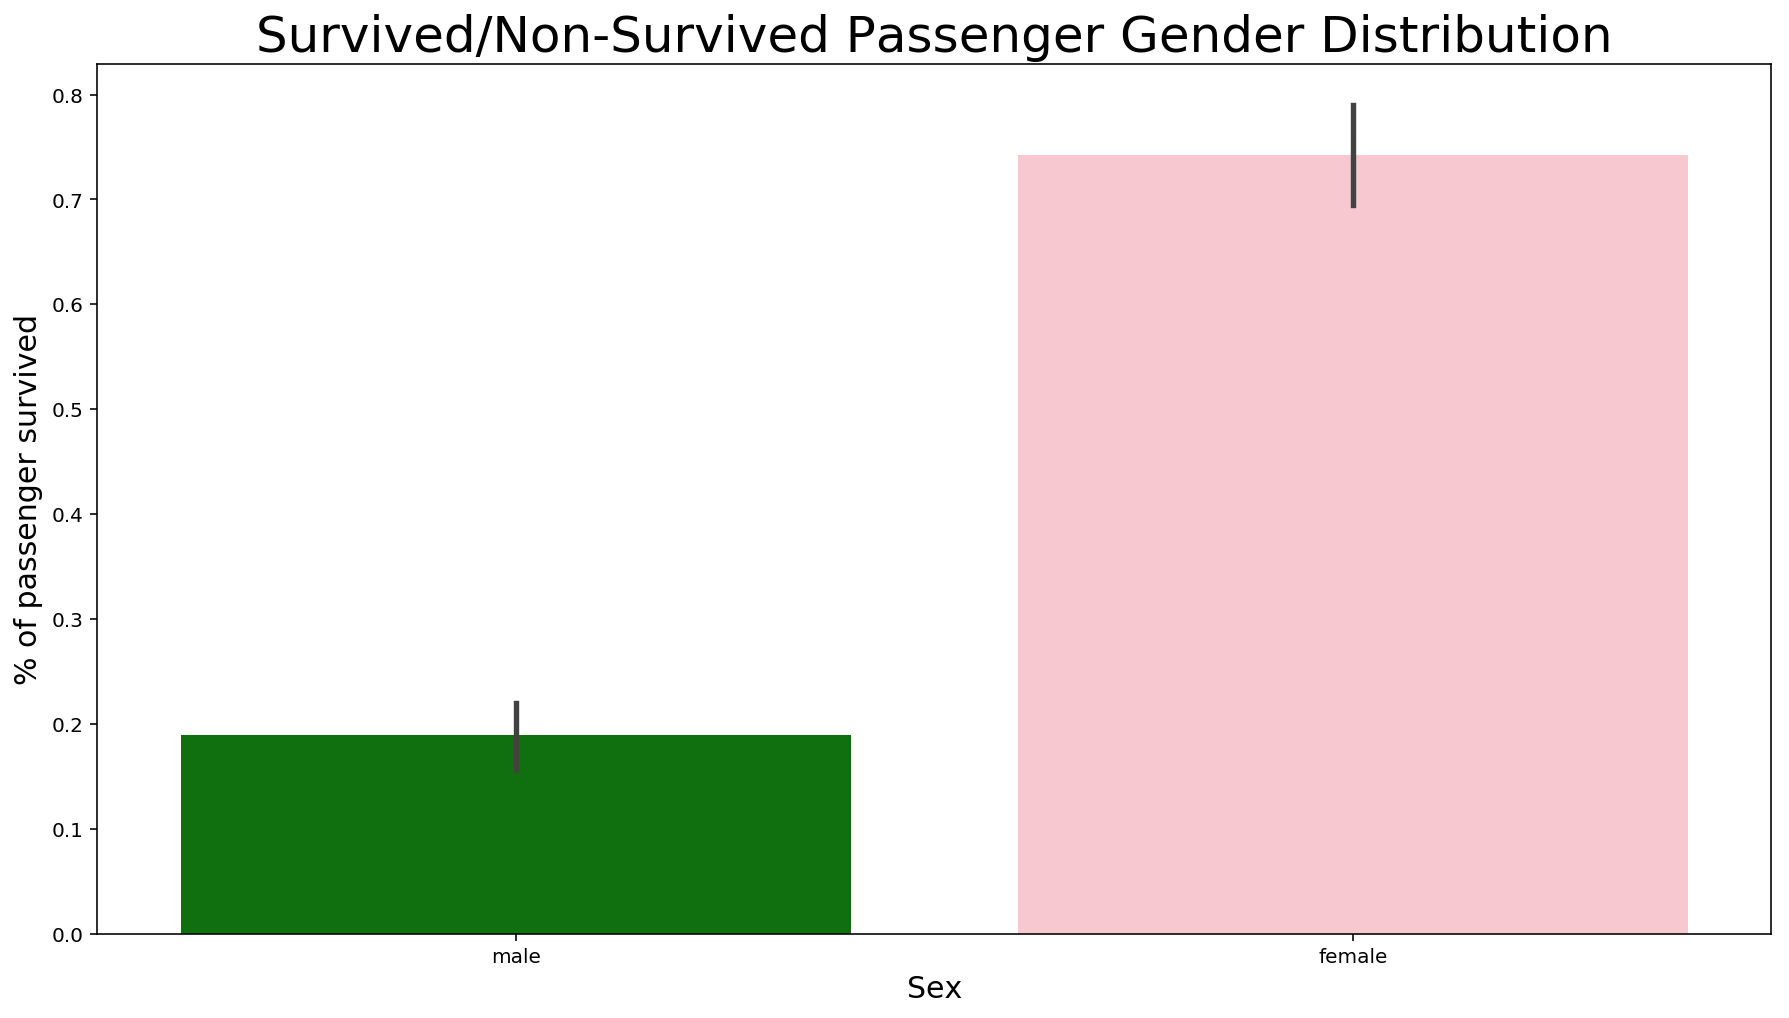

In [31]:
pal = {'male':"green", 'female':"Pink"}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            palette = pal,
            linewidth=2 )
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);



This bar plot above shows the distribution of female and male survived. The ***x_label*** represents **Sex** feature while the ***y_label*** represents the % of **passenger survived**. This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

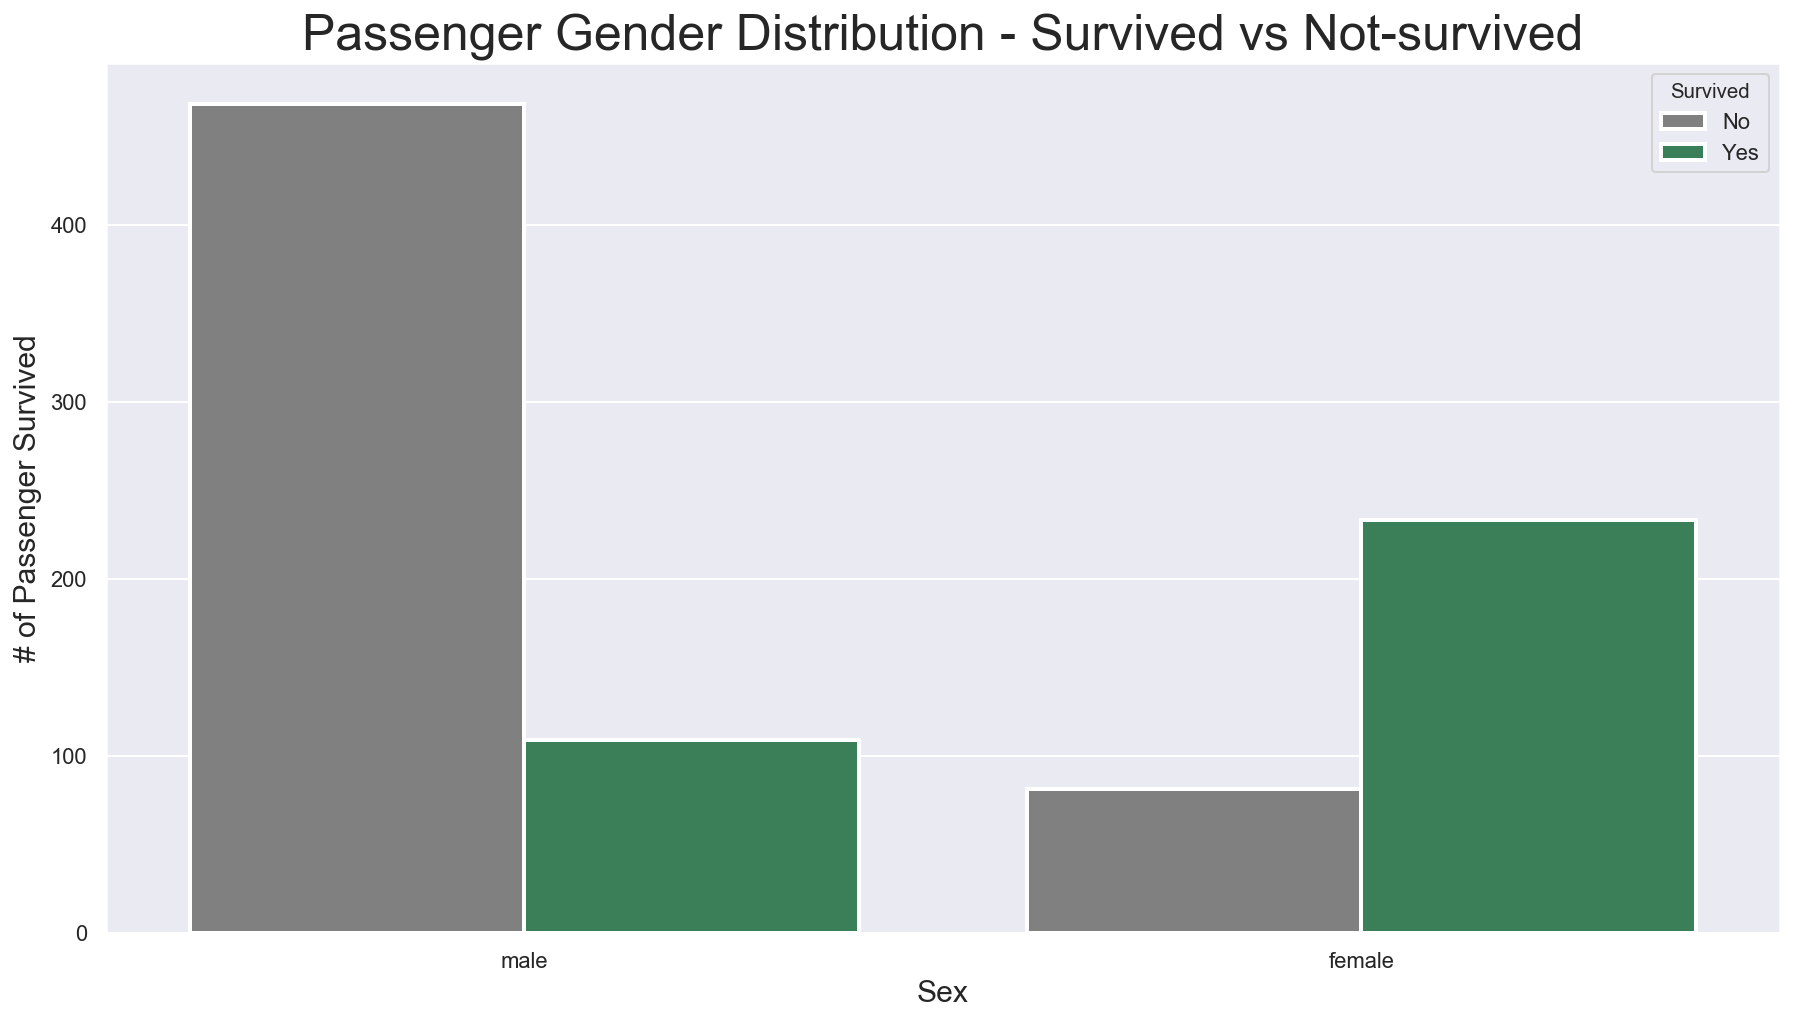

In [32]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive. 

**Summary**
***
- As we suspected, female passengers have survived at a much better rate than male passengers. 
- It seems about right since females and children were the priority. 

## 3b. Pclass and Survived
<a id="pcalss_and_survived"></a>
***

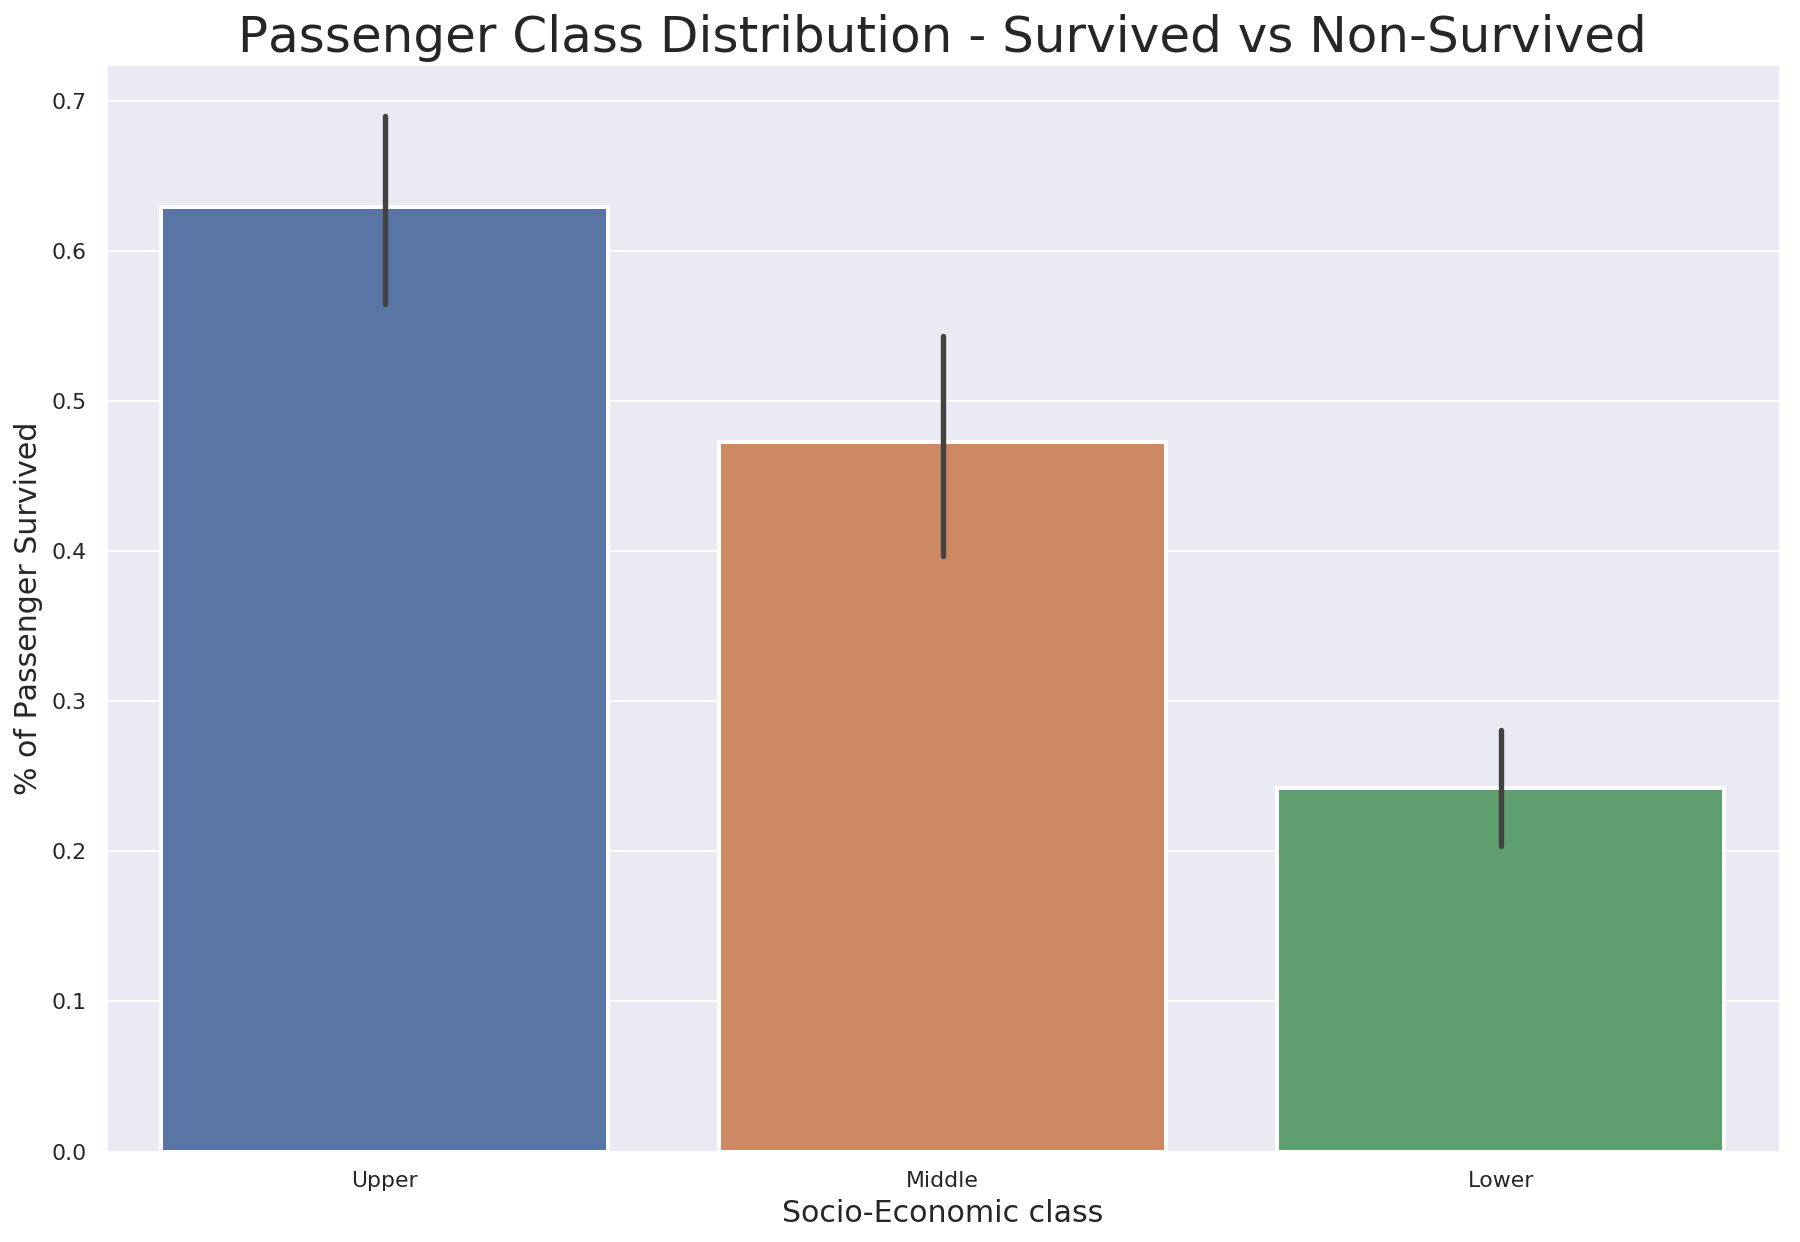

In [26]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

- It looks like ...
    - ~ 63% first class passenger survived titanic tragedy, while 
    - ~ 48% second class and 
    - ~ only  24% third class passenger survived. 



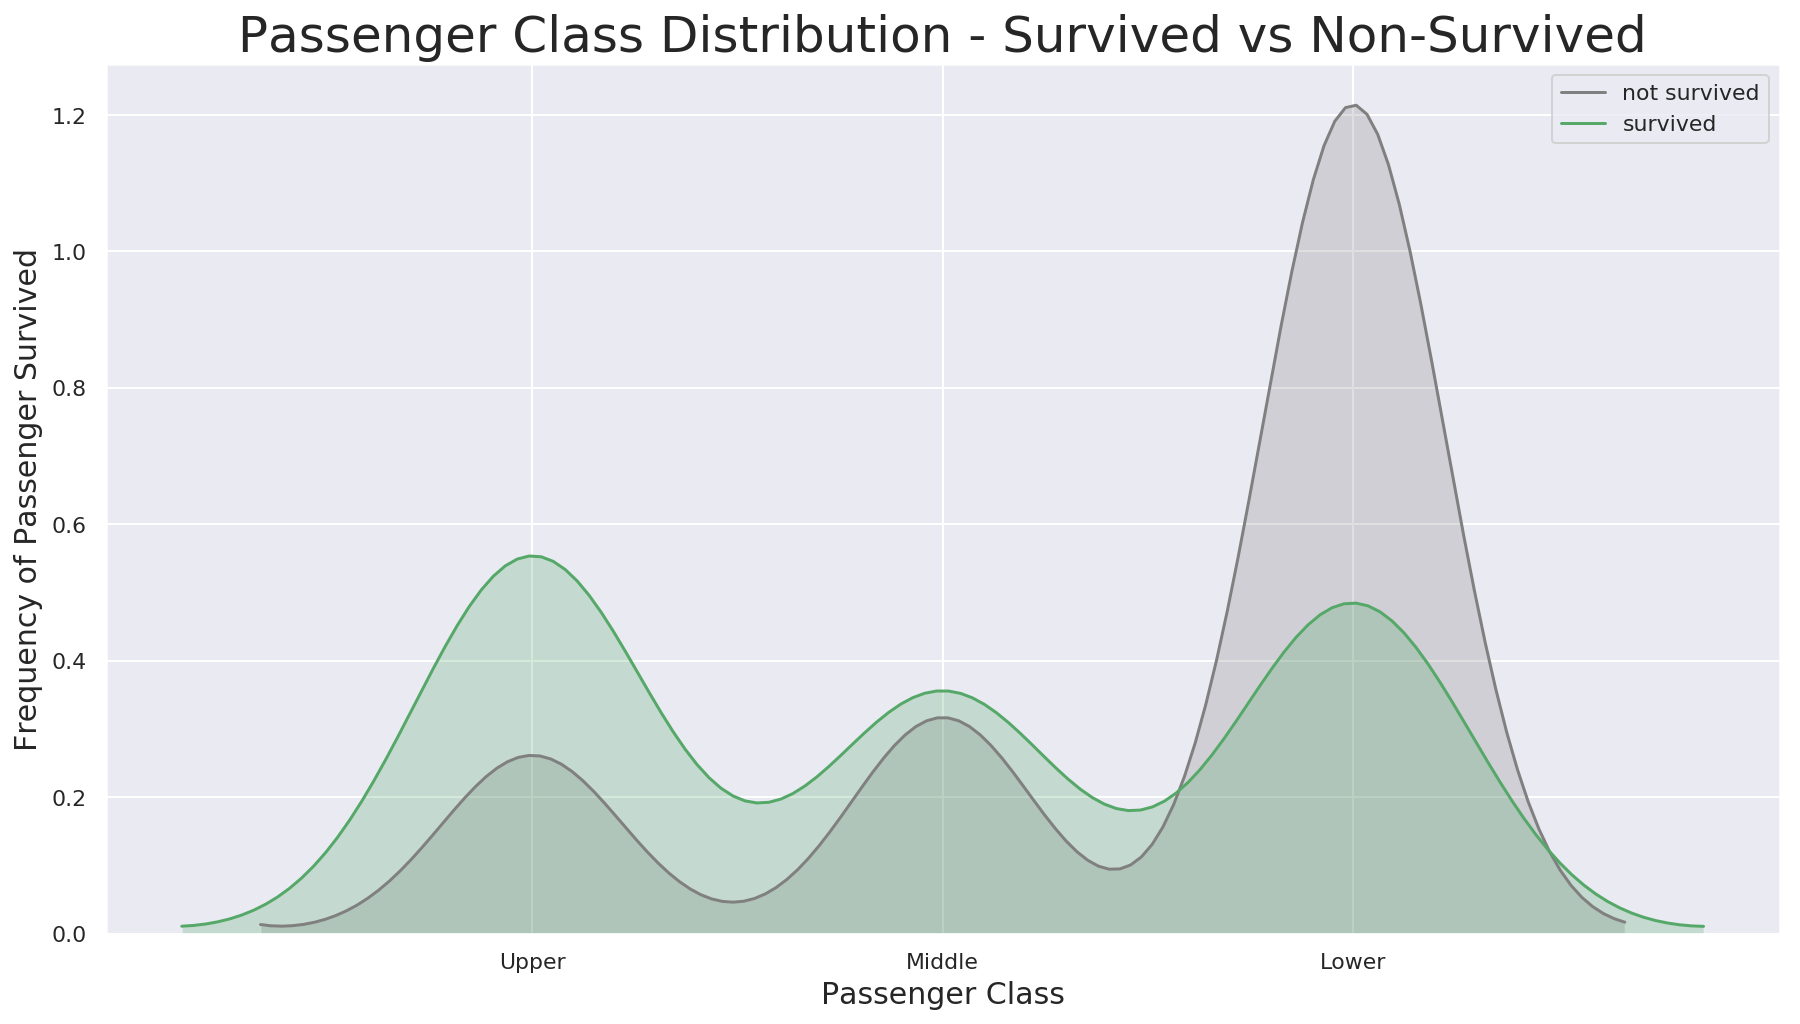

In [27]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

This KDE plot is pretty self-explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that the lower class passengers have survived more than second-class passengers. It is true since there were a lot more third-class passengers than first and second. 

**Summary**
***
The first class passengers had the upper hand during the tragedy than second and third. You can probably agree with me more on this, in the next section of visualizations where we look at the distribution of ticket fare and survived column. 

## 3c. Fare and Survived
<a id="fare_and_survived"></a>
***

Text(0.5, 0, 'Fare')

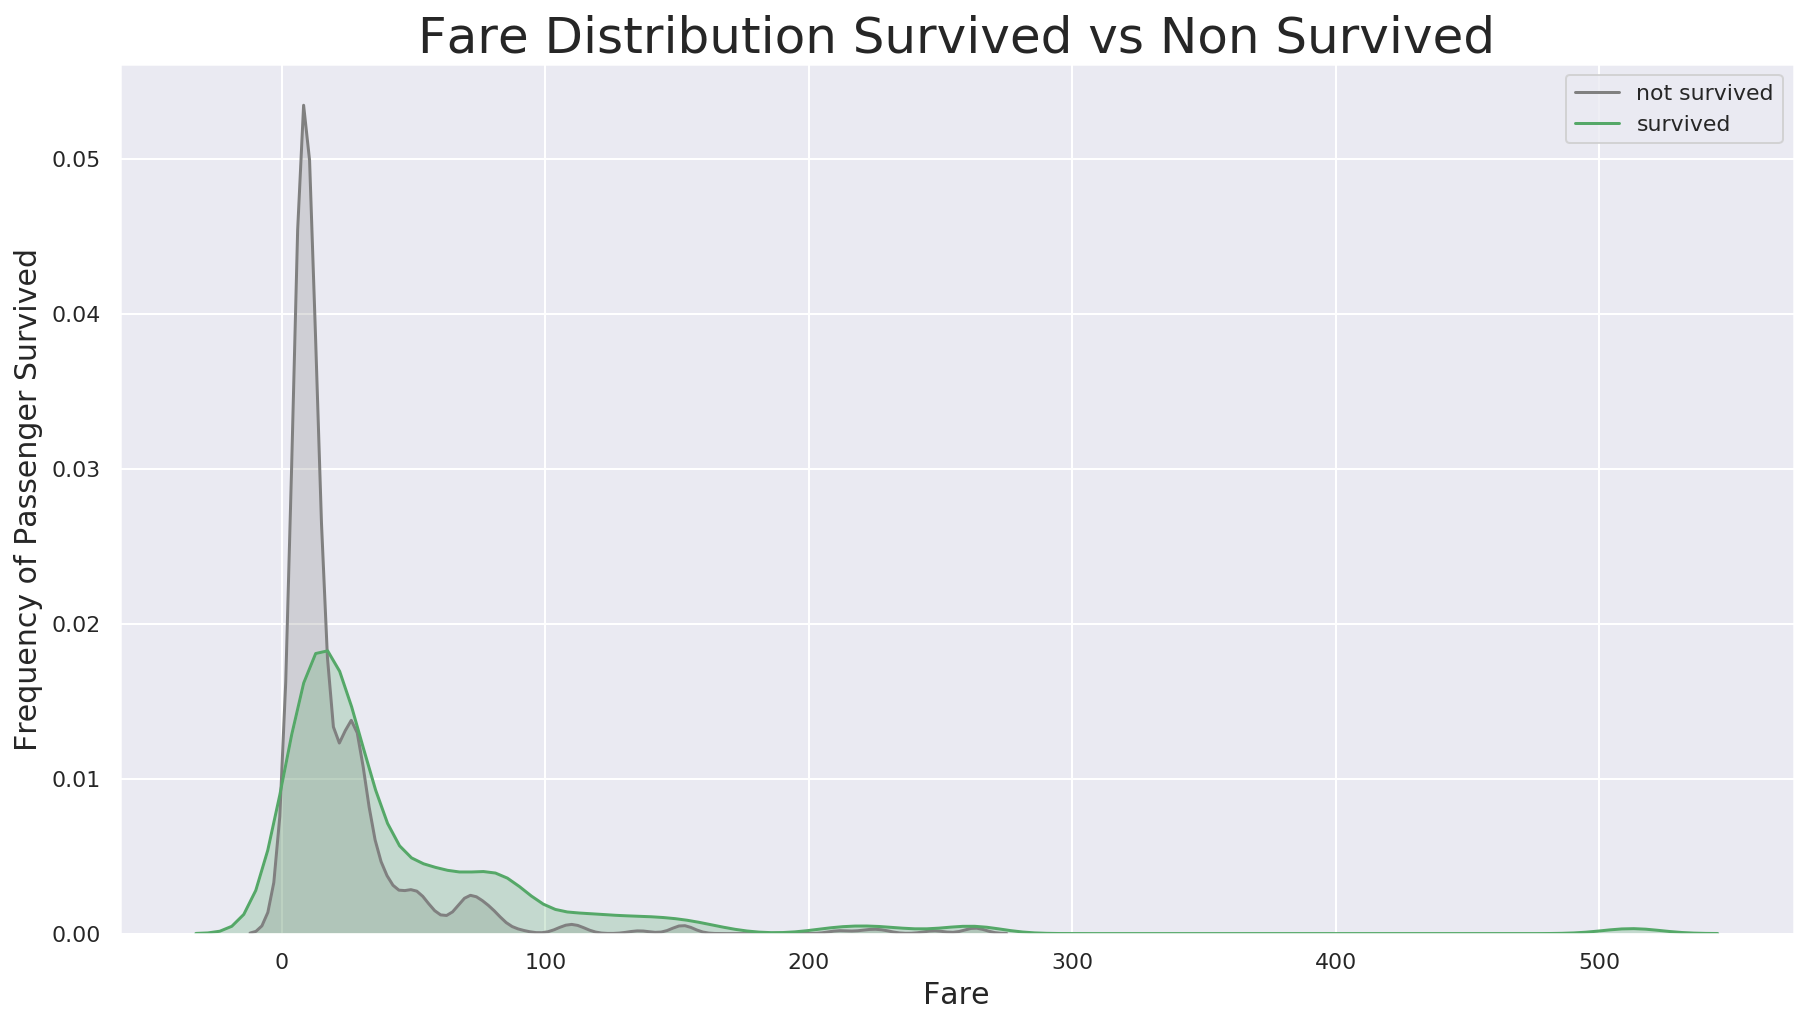

In [28]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)



This plot shows something impressive..
- The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive. 
- When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check...

In [29]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now. 

## 3d. Age and Survived
<a id="age_and_survived"></a>
***

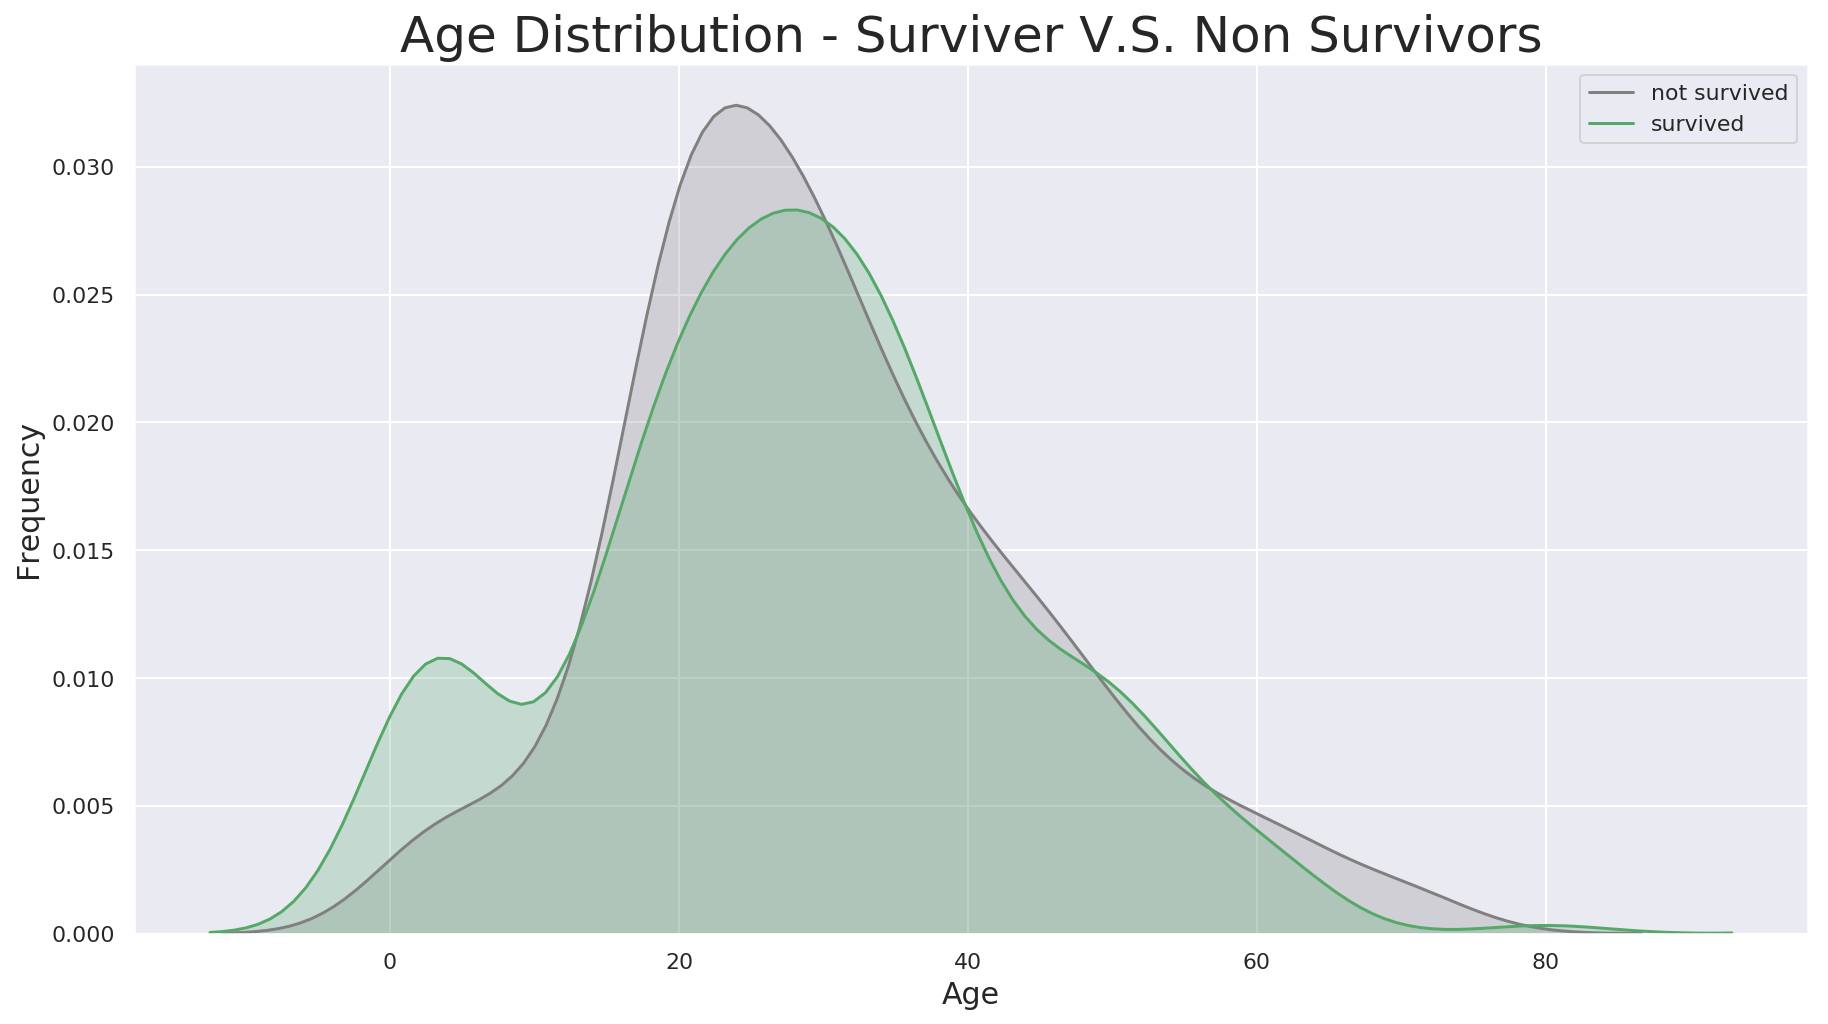

In [30]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

There is nothing out of the ordinary of about this plot, except the very left part of the distribution. It proves that children and infants were the priority, therefore, a good chunk of infant/children were saved. 

## 3e. Combined Feature Relations
<a id='combined_feature_relations'></a>
***
In this section, we are going to discover more than two feature relations in a single graph. I will try my best to illustrate most of the feature relations. Let's get to it. 

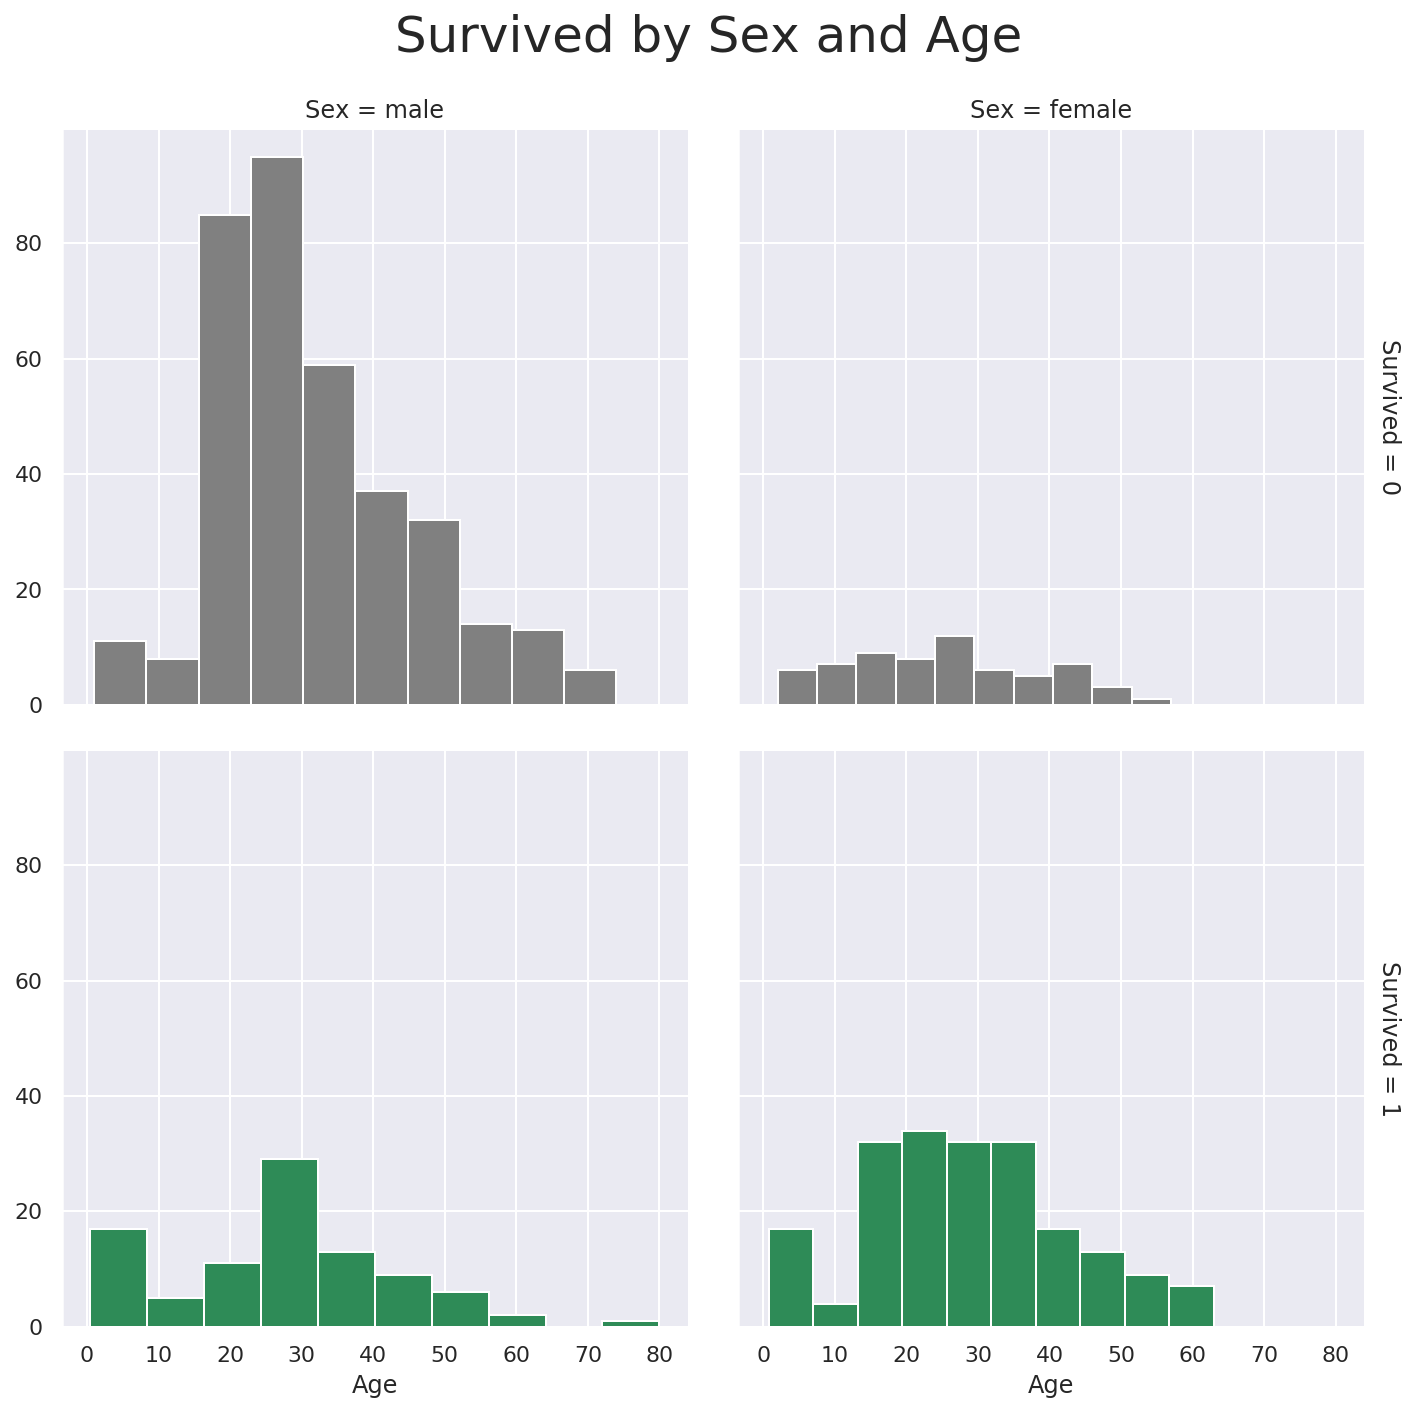

In [31]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)


Facetgrid is a great way to visualize multiple variables and their relationships at once. From section 3a we have a bright idea of females being more of a priority then males. However, from this facet grid, we can also understand which age range groups survived more than others or were not so lucky

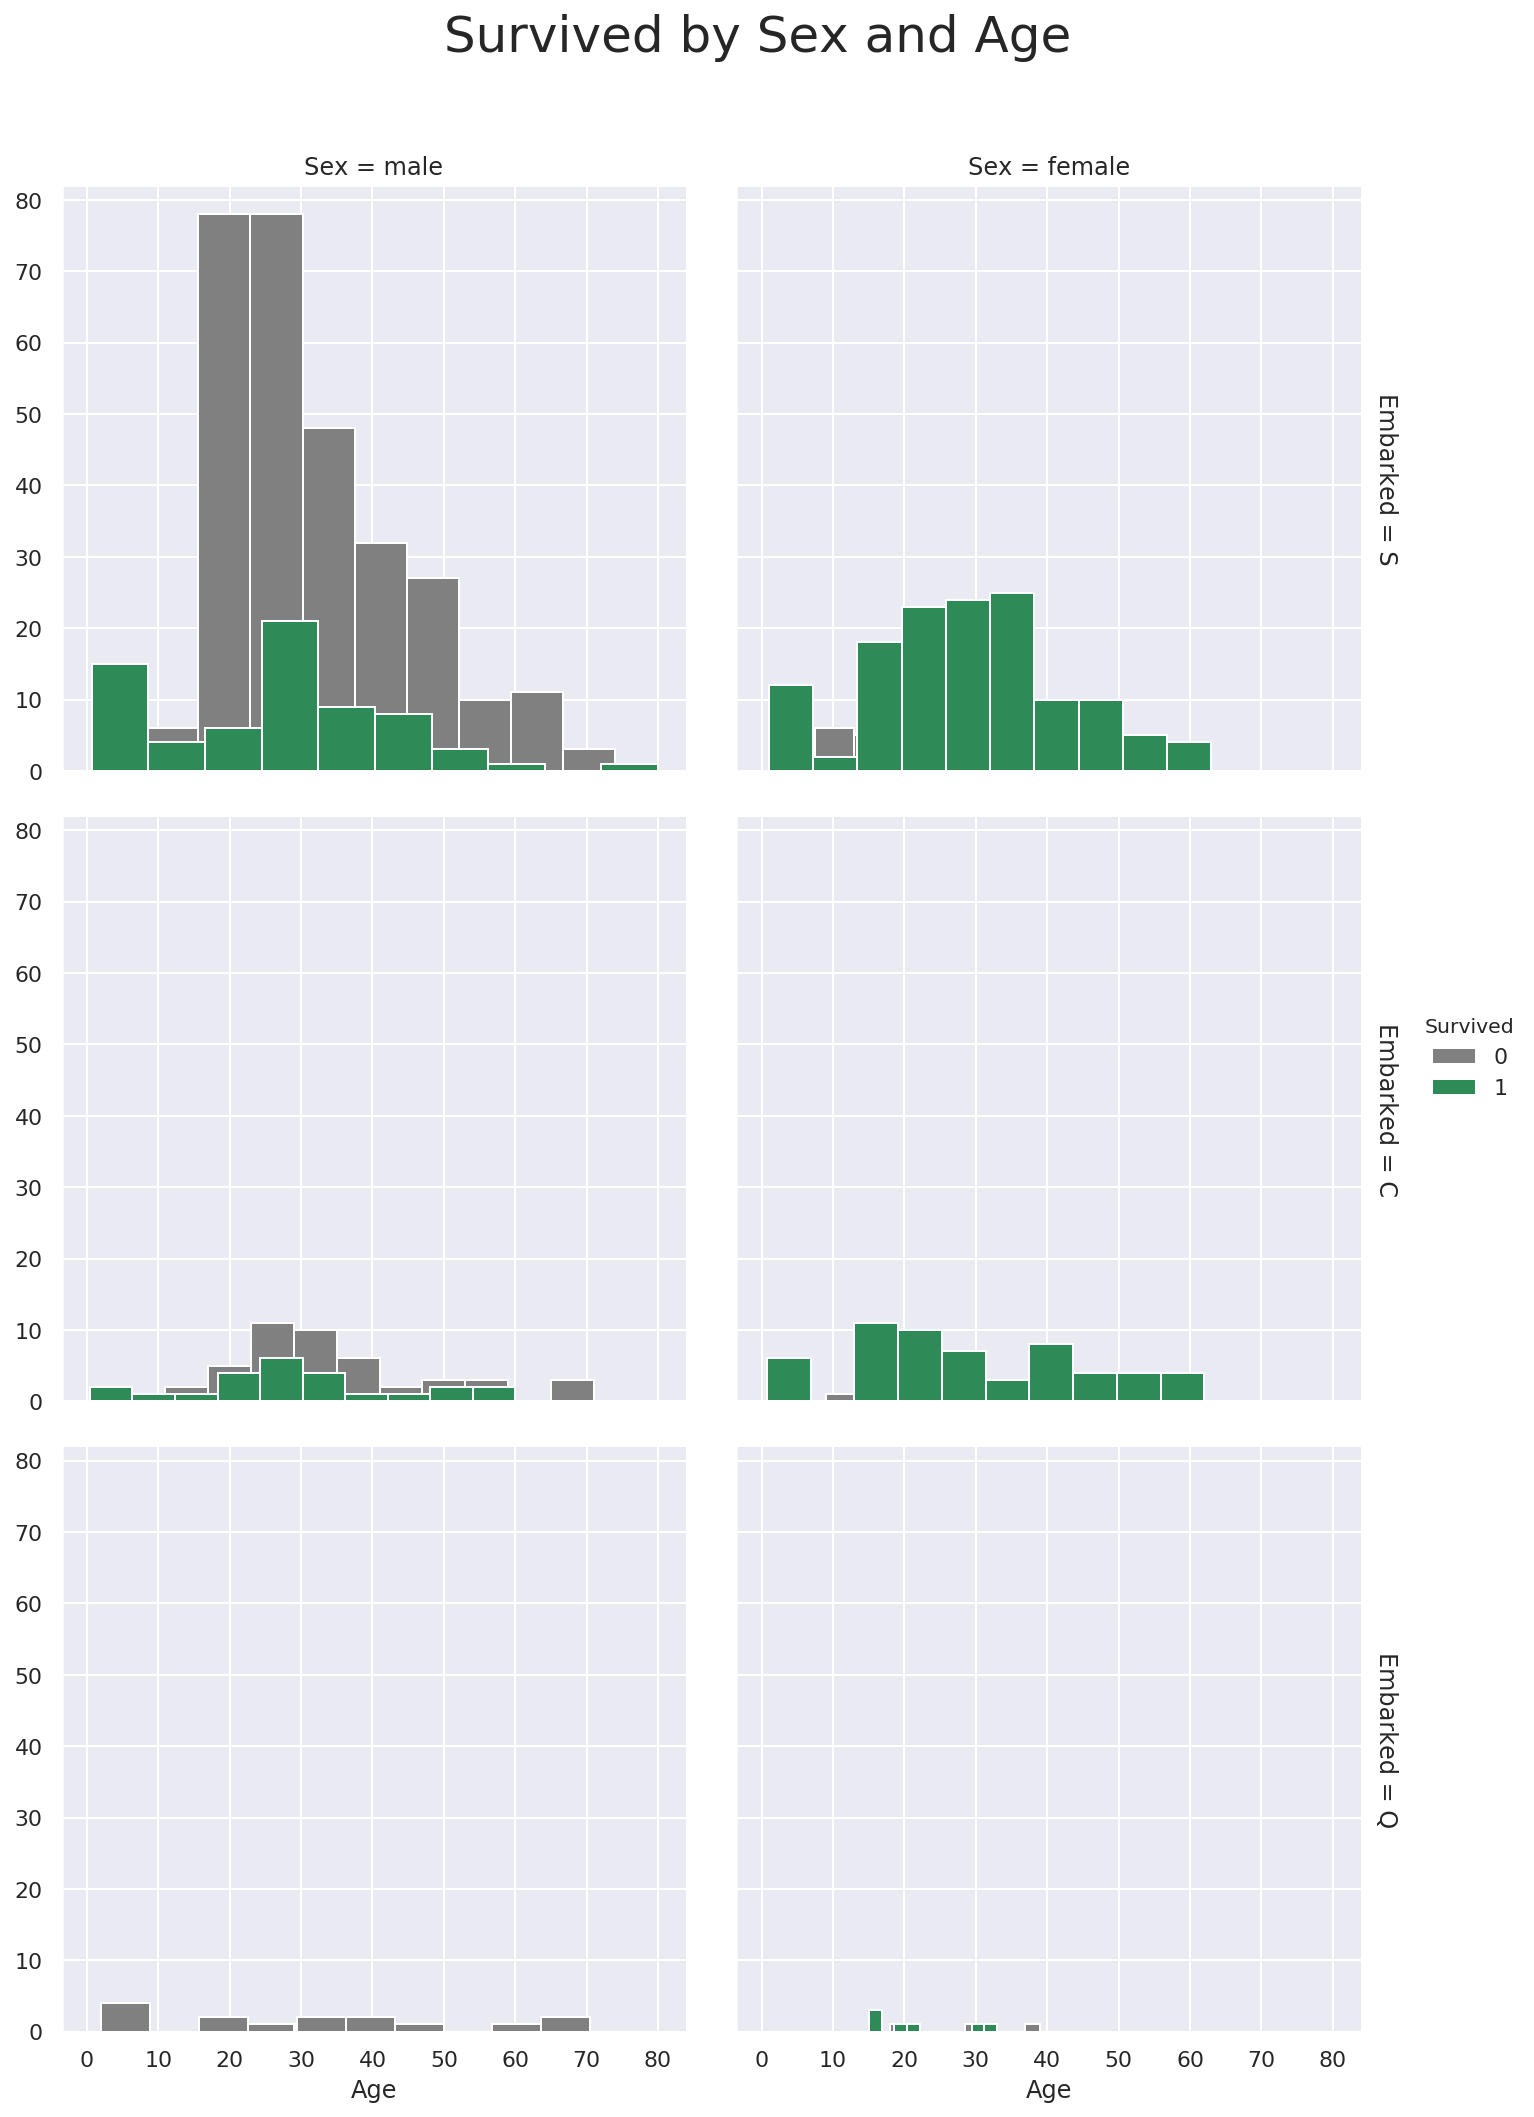

In [32]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

This is another compelling facet grid illustrating four features relationship at once. They are **Embarked, Age, Survived & Sex**. 
* The color illustrates passengers survival status(green represents survived, gray represents not survived)
* The column represents Sex(left being male, right stands for female)
* The row represents Embarked(from top to bottom: S, C, Q)
***
Now that I have steered out the apparent let's see if we can get some insights that are not so obvious as we look at the data. 
* Most passengers seem to be boarded on Southampton(S).
* More than 60% of the passengers died boarded on Southampton. 
* More than 60% of the passengers lived boarded on Cherbourg(C).
* Pretty much every male that boarded on Queenstown(Q) did not survive. 
* There were very few females boarded on Queenstown, however, most of them survived. 

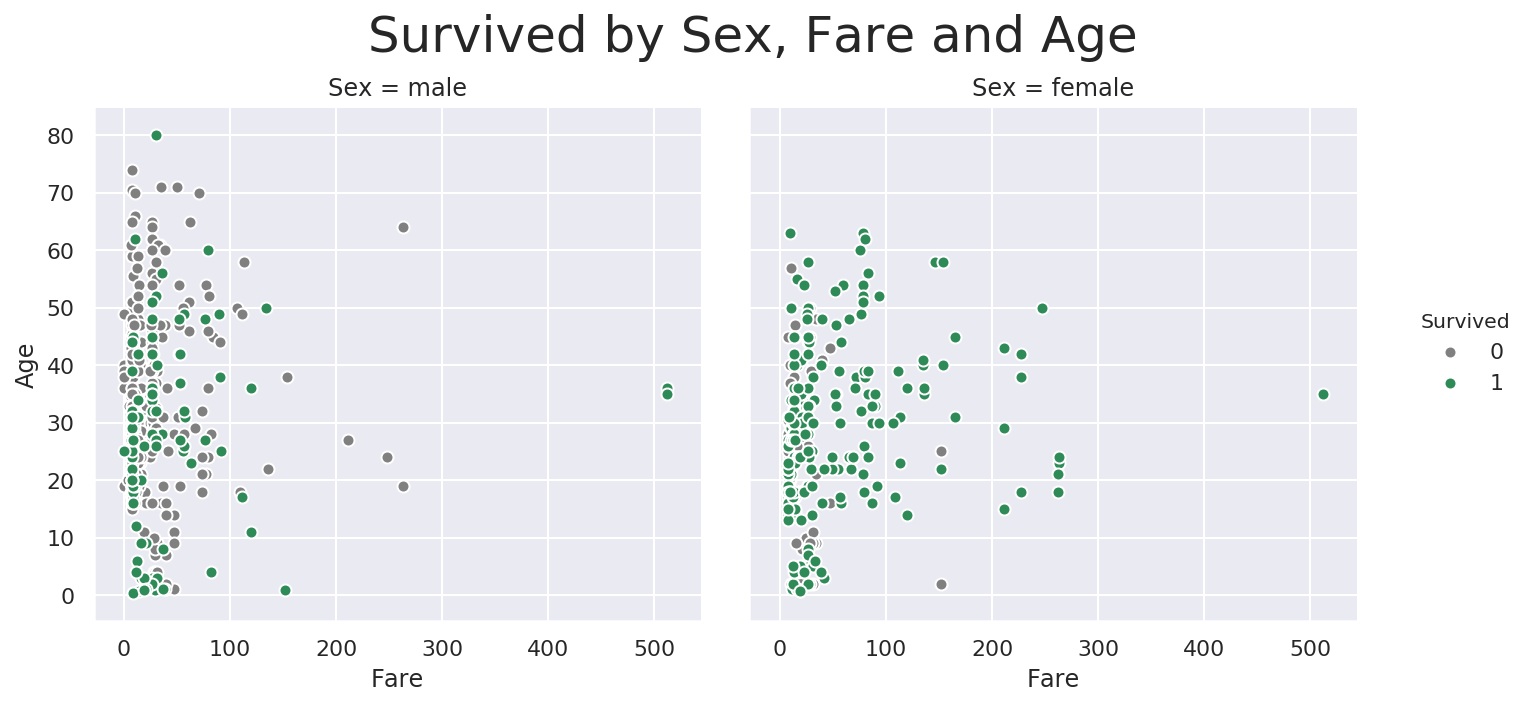

In [33]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

This grid unveils a couple of interesting insights. Let's find out.
* The facet grid above clearly demonstrates the three outliers with Fare of over \$500. At this point, I think we are quite confident that these outliers should be deleted.
* Most of the passengers were with in the Fare range of \$100. 

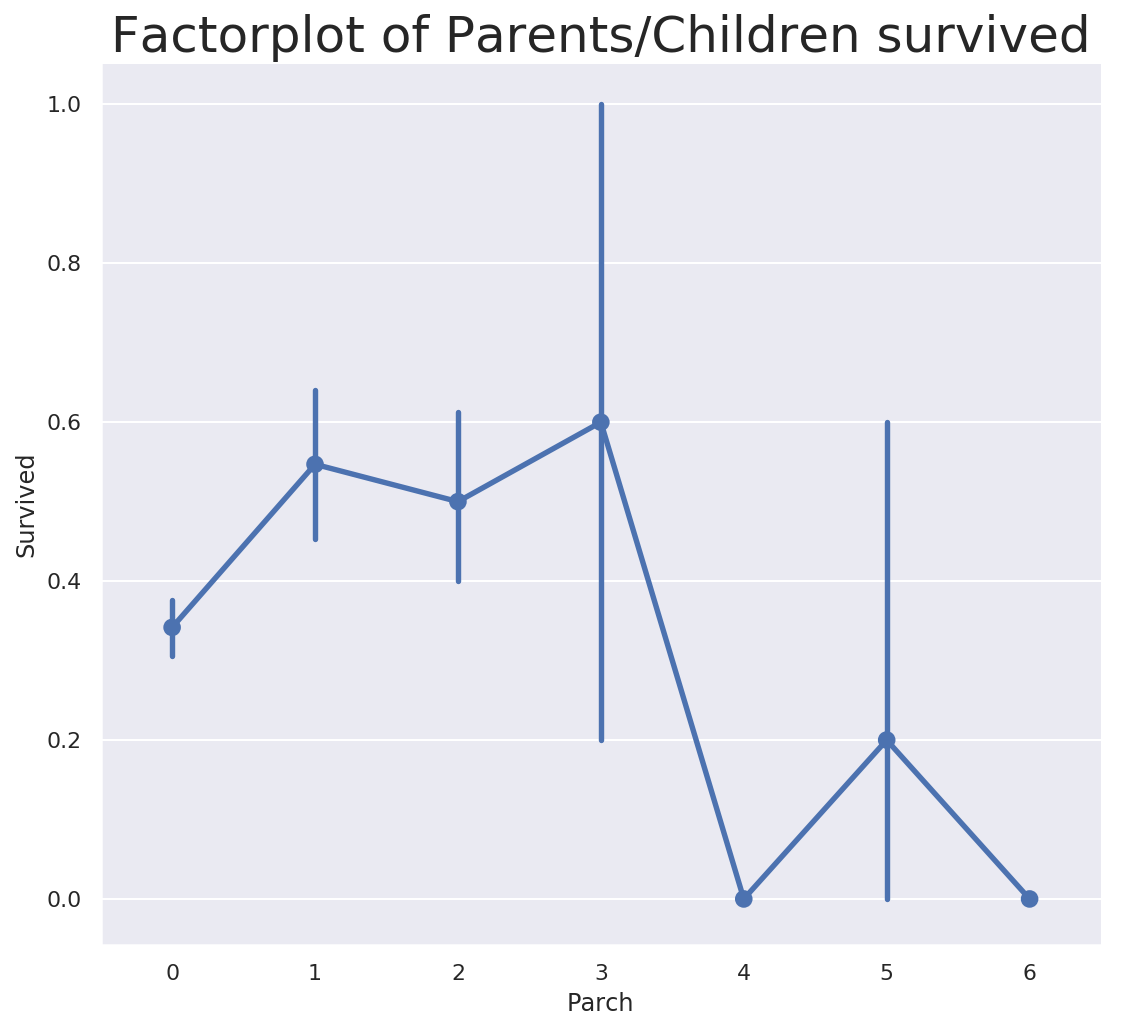

In [34]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

**Passenger who traveled in big groups with parents/children had less survival rate than other passengers.**

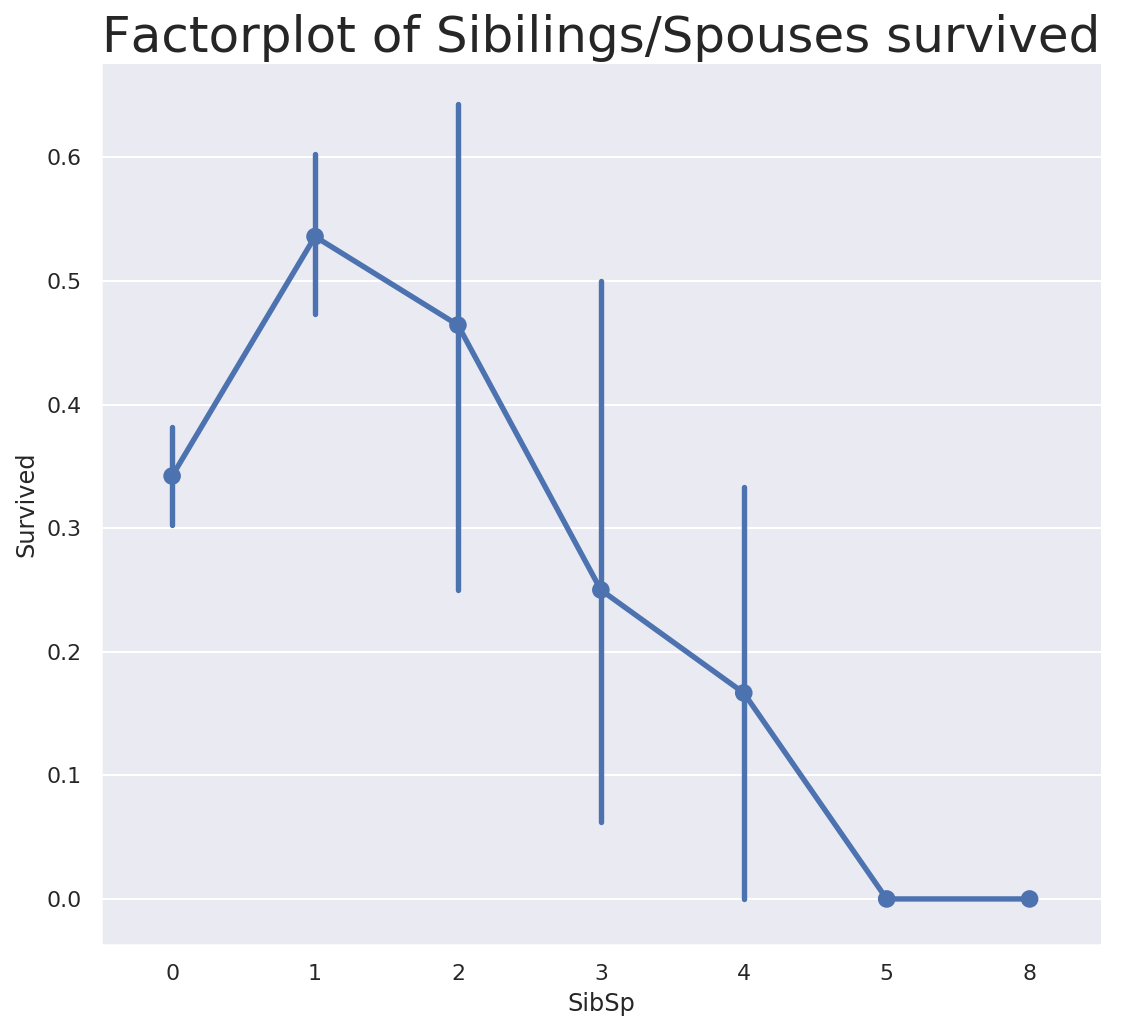

In [35]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

**While, passenger who traveled in small groups with sibilings/spouses had more survival rate than other passengers.**

In [36]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# Part 4: Statistical Overview
<a id="statisticaloverview"></a>
***

![title](https://cdn-images-1.medium.com/max/400/1*hFJ-LI7IXcWpxSLtaC0dfg.png)

**Train info**

In [37]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [38]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Nye, Mrs. (Elizabeth Ramell)",1601,G,S
freq,1,7,464,644


In [39]:
train[['Pclass', 'Survived']].groupby("Pclass").mean().reset_index()

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [40]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [41]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [42]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


I have gathered a small summary from the statistical overview above. Let's see what they are...
- This data set has 891 raw and 9 columns. 
- only 38% passenger survived during that tragedy.
- ~74% female passenger survived, while only ~19% male passenger survived. 
- ~63% first class passengers survived, while only 24% lower class passenger survived.



## 4a. Correlation Matrix and Heatmap
<a id="heatmap"></a>
***
### Correlations

In [43]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


** Sex is the most important correlated feature with *Survived(dependent variable)* feature followed by Pclass.** 

In [44]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64


**Squaring the correlation feature not only gives on positive correlations but also amplifies the relationships.** 

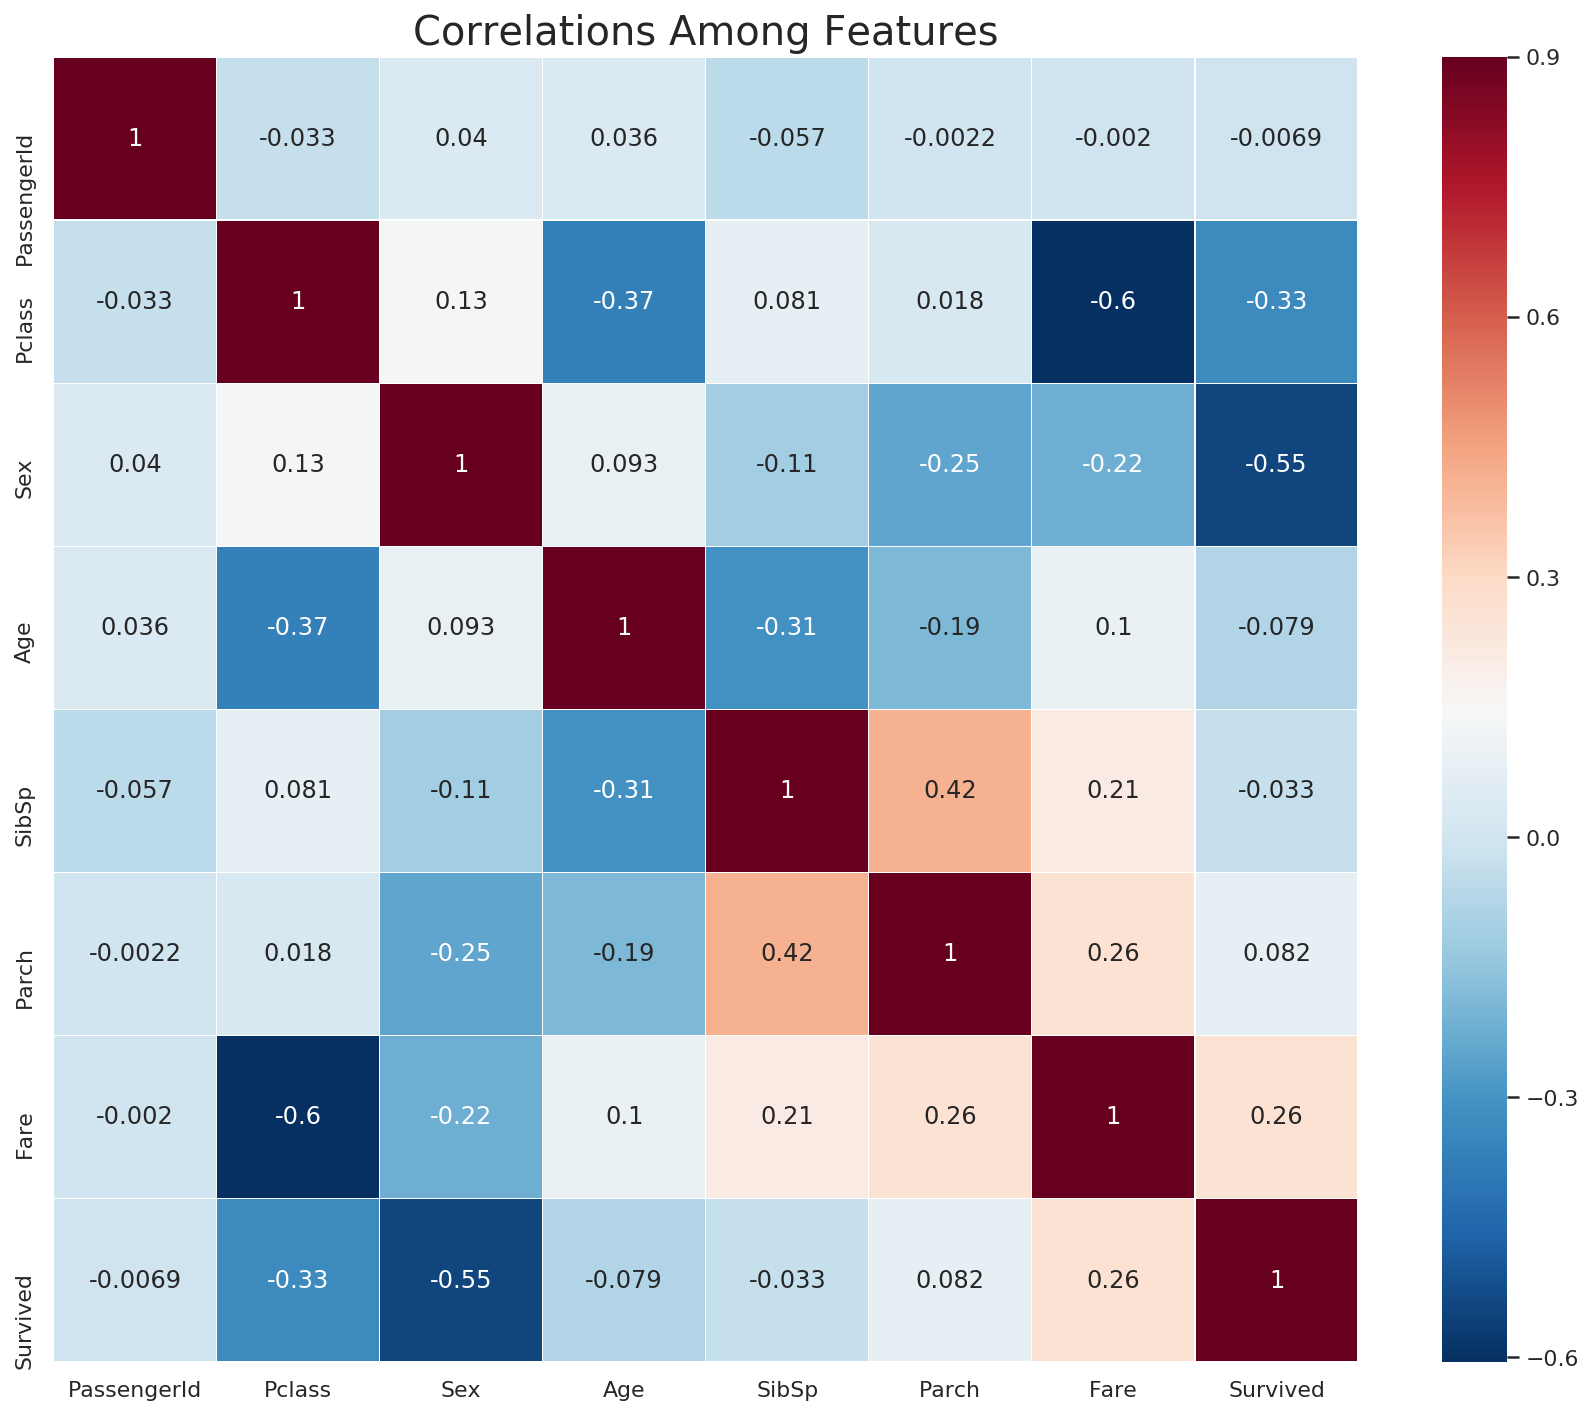

In [45]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

#### Positive Correlation Features:
- Fare and Survived: 0.26

#### Negative Correlation Features:
- Fare and Pclass: -0.6
- Sex and Survived: -0.55
- Pclass and Survived: -0.33


**So, Let's analyze these correlations a bit.** We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived rated. This relationship reveals that the passenger who paid more money for their ticket were more likely to survive. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.33. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

However, the most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. This negative correlation with a magnitude of -0.54 which points towards some undeniable insights. Let's do some statistics to see how statistically significant this correlation is. 

## 4b. Statistical Test for Correlation
<a id="statistical_test"></a>
***

Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of the trials and see how we are doing with our predictions.

###  Hypothesis Testing Outline

A hypothesis test compares the mean of a control group and experimental group and tries to find out whether the two sample means are different from each other and if they are different, how significant that difference is.
 
A **hypothesis test** usually consists of multiple parts: 

1. Formulate a well-developed research problem or question: The hypothesis test usually starts with a concrete and well-developed researched problem. We need to ask the right question that can be answered using statistical analyses. 
2. The null hypothesis ($H_0$) and Alternating hypothesis($H_1$):
> * The **null hypothesis($H_0$)** is something that is assumed to be true. It is the status quo. In a null hypothesis, the observations are the result of pure chance. When we set out to experiment, we form the null hypothesis by saying that there is no difference between the means of the control group and the experimental group.
> *  An **Alternative hypothesis($H_A$)** is a claim and the opposite of the null hypothesis.  It is going against the status quo. In an alternative theory, the observations show a real effect combined with a component of chance variation.
    
3. Determine the **test statistic**: test statistic can be used to assess the truth of the null hypothesis. Depending on the standard deviation we either use t-statistics or z-statistics. In addition to that, we want to identify whether the test is a one-tailed test or two-tailed test. 

4. Specify a **Significance level**: The significance level($\alpha$) is the probability of rejecting a null hypothesis when it is true. In other words, we are ***comfortable/confident*** with rejecting the null hypothesis a significant amount of times even though it is true. This considerable amount is our Significant level. In addition to that significance level is one minus our Confidence interval. For example, if we say, our significance level is 5%, then our confidence interval would be (1 - 0.05) = 0.95 or 95%. 

5. Compute the **T-statistics**: Computing the t-statistics follows a simple equation. This equation slightly differs depending on one sample test or two sample test  

6. Compute the **P-value**: P-value is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis was correct. The p-value is known to be unintuitive, and even many professors are known to explain it wrong. I think this [video](https://www.youtube.com/watch?v=E4KCfcVwzyw) explains the p-value well. **The smaller the P-value, the stronger the evidence against the null hypothesis.**

7. **Describe the result and compare the p-value with the significance value($\alpha$)**: If p<= $\alpha$, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid. However if the p> $\alpha$, we say that, we fail to reject the null hypothesis. Even though this sentence is grammatically wrong, it is logically right. We never accept the null hypothesis just because we are doing the statistical test with sample data points.

We will follow each of these steps above to do your hypothesis testing below.

***

### Hypothesis testing
#### Formulating a well developed researched question: 
Regarding this dataset, we can formulate the null hypothesis and alternative hypothesis by asking the following questions. 
> * **Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?**. 
> * **Is there a substantial difference in the survival rate between the male and female passengers?**
#### The Null Hypothesis and The Alternative Hypothesis
We can formulate our hypothesis by asking questions differently. However, it is essential to understand what our end goal is. Here our dependent variable or target variable is **Survived**. Therefore, we say

> ** Null Hypothesis($H_0$)** There is no difference in the survival rate between the male and female passengers. or the mean difference between male and female passenger in the survival rate is zero.  
>  ** Alternative Hypothesis($H_A$):** There is a difference in the survival rate between the male and female passengers. or the mean difference in the survival rate between male and female is not zero. 

#### Determine the test statistics
> This will be a two-tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 0. 
> Since we do not know the standard deviation($\sigma$) and n is small, we will use the t-distribution. 

#### Specify the significance level
> Specifying a significance level is an important step of the hypothesis test. It is an ultimate balance between type 1 error and type 2 error. We will discuss more in-depth about those in another lesson. For now, we have decided to make our significance level($\alpha$) = 0.05. So, our confidence interval or non-rejection region would be (1 - $\alpha$) =   95%. 

#### Computing T-statistics and P-value
Let's take a random sample and see the difference.

In [46]:
male_mean = train[train['Sex'] == 1].Survived.mean()

female_mean = train[train['Sex'] == 0].Survived.mean()
print ("Male survival mean: " + str(male_mean))
print ("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Male survival mean: 0.18608695652173912
female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: 0.5551271009862481


Now, we have to understand that those two means are not  **the population mean**.  *The population mean is a statistical term statistician uses to indicate the actual average of the entire group. The group can be any gathering of multiple numbers such as animal, human, plants, money, stocks.* For example, To find the age population mean of Bulgaria; we have to account for every single person's age and take their age. Which is almost impossible and if we were to go that route; there is no point of doing statistics in the first place. Therefore we approach this problem using sample sets. The idea of using sample set is that; if we take multiple samples of the same population and take the mean of them and put them in a distribution; eventually our distribution start to look more like a **normal distribution**. The more samples we take and the more sample means with be added and the closer the normal distribution with reach towards population mean. This is where **Central limit theory** comes from. We will go into this topic later on. 

Going back to our dataset, like we are saying these means above are part of the whole story. We were given part of the data to train our machine learning models, and the other part of the data was held back for testing. Therefore, It is impossible for us to know the population means of survival for male and females. Situation like this calls for a statistical approach. We will use the sampling distribution approach to do the test. let's take 50 random sample of male and female from our train data.

In [47]:
# separating male and female dataframe. 
male = train[train['Sex'] == 1]
female = train[train['Sex'] == 0]

# getting 50 random sample for male and female. 
import random
male_sample = random.sample(list(male['Survived']),50)
female_sample = random.sample(list(female['Survived']),50)

# Taking a sample means of survival feature from male and female
male_sample_mean = np.mean(male_sample)
female_sample_mean = np.mean(female_sample)

# Print them out
print ("Male sample mean: " + str(male_sample_mean))
print ("Female sample mean: " + str(female_sample_mean))
print ("Difference between male and female sample mean: " + str(female_sample_mean - male_sample_mean))

Male sample mean: 0.08
Female sample mean: 0.78
Difference between male and female sample mean: 0.7000000000000001


According to the samples our male and female mean measured difference is 0.58, keeping in mind that...
* We randomly select 50 people to be in the male group and 50 people to be in the female group. 
* We know our sample is selected from a broader population(whole dataset of titanic). 
* We know we could have ended up with a different random sample of males or females from the total dataset. 
***
With all three points above in mind, how confident are we that, the measured difference is real or statistically significant? we can perform a **t-test** to evaluate that. When we perform a **t-test** we are usually trying to find out **an evidence of significant difference between population mean with hypothesized mean(1 sample t-test) or in our case difference between two population means(2 sample t-test).** 



The **t-statistics** is the measure of a degree to which our groups differ standardized by the variance of our measurements. In order words, it is basically the measure of signal over noise. Let us describe the previous sentence a bit more for clarification. I am going to use [this post](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen) as reference to describe the t-statistics here. 


#### Calculating the t-statistics
# $$t = \frac{\bar{x}-\mu}{\frac{S} {\sqrt{n}} }$$

Here..
* $\bar{x}$ is the sample mean. 
* $\mu$ is the hypothesized mean. 
* S is the standard devaition. 
* n is the sample size. 


Now, the denominator of this fraction $(\bar{x}-\mu)$ is basically the strength of the signal. where we calculate the difference between hypothesized mean and sample mean. If the mean difference is higher, then the signal is stronger. 

the numerator of this fraction ** ${S}/ {\sqrt{n}}$ ** calculates the amount of variation or noise of the data set. Here S is standard deviation, which tells us how much variation is there in the data. n is the sample size. 

So, according to the explanation above, the t-value or t-statistics is basically measures the strength of the signal(the difference) to the amount of noise(the variation) in the data and that is how we calculate the t-value in one sample t-test. However, in order to calculate between two sample population mean or in our case we will use the follow equation. 

# $$t = \frac{\bar{x}_M - \bar{x}_F}{\sqrt {s^2 (\frac{1}{n_M} + \frac{1}{n_F})}}$$

This equation may seem too complex, however, the idea behind these two are similar. Both of them have the concept of signal/noise. The only difference is that we replace our hypothesis mean with another sample mean and the two sample sizes repalce one sample size. 

Here..
* $\bar{x}_M$ is the mean of our male group sample measurements. 
* $ \bar{x}_F$ is the mean of female group samples. 
* $ n_M$ and $n_F$ are the sample number of observations in each group. 
* $ S^2$ is the sample variance.

It is good to have an understanding of what going on in the background. However, we will use **scipy.stats** to find the t-statistics. 


In [48]:
import scipy.stats as stats

print (stats.ttest_ind(male_sample, female_sample))
print ("This is the p-value when we break it into standard form: " + format(stats.ttest_ind(male_sample, female_sample).pvalue, '.32f'))

Ttest_indResult(statistic=-9.895456798594738, pvalue=2.0407440586692328e-16)
This is the p-value when we break it into standard form: 0.00000000000000020407440586692328


#### Compare P-value with $\alpha$
> It looks like the p-value is very small compared to our significance level($\alpha$)of 0.05. Our observation sample is statistically significant. Therefore, our null hypothesis is ruled out, and our alternative hypothesis is valid, which is "**There is a significant difference in the survival rate between the male and female passengers."**

# Part 5: Feature Engineering
<a id="feature_engineering"></a>
***
Feature Engineering is exactly what its sounds like. Sometimes we want to create extra features from with in the features that we have, sometimes we want to remove features that are alike. Features engineering is the simple word for doing all those. It is important to remember that we will create new features in such ways that will not cause **multicollinearity(when there is a relationship among independent variables)** to occur. 

## name_length
***
***Creating a new feature "name_length" that will take the count of letters of each name***

In [49]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

## Here "map" is python's built-in function. 
## "map" function basically takes a function and 
## returns an iterable list/tuple or in this case series. 
## However,"map" can also be used like map(function) e.g. map(name_length_group) 
## or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]). 
## However, here we don't need to use parameter("size") for name_length_group because when we 
## used the map function like ".map" with a series before dot, we are basically hinting that series 
## and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list. 

In [50]:
## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

## Title
***Getting the title of each name as a new feature. ***

In [51]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

In [52]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]



#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## test data
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

## family_size feature
***Creating a new feature called "family_size".*** 

In [53]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [54]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [55]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

## is_alone feature

In [56]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

## Ticket feature

In [57]:
train.Ticket.value_counts().sample(10)

113503        1
367226        2
348121        1
349203        1
350034        1
2664          1
230434        1
A/4. 20589    1
315096        1
382649        1
Name: Ticket, dtype: int64

I have yet to figureout how to best manage ticket feature. So, any suggestion would be truly appreciated. For now, I will get rid off the ticket feature.

In [58]:
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

## fare feature
### calculated_fare feature

In [59]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

Some people have travelled in groups like family or friends. It seems like Fare column kept a record of the total fare rather than the fare of individual passenger, therefore calculated fare will be much handy in this situation. 

### fare_group

In [60]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

Fare group was calculated based on <i>calculated_fare</i>. This can further help our cause. 

### PassengerId column

It seems like <i>PassengerId</i> column only works as an id in this dataset without any significant effect on the dataset. Let's drop it.

In [61]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

## Creating dummy variables

You might be wondering what is a dummy variable? 

Dummy variable is an important **prepocessing machine learning step**. Often times Categorical variables are an important features, which can be the difference between a good model and a great model. While working with a dataset, having meaningful value for example, "male" or "female" instead of 0's and 1's is more intuitive for us. However, machines do not understand the value of categorical values, for example, in this dataset we have gender male or female, algorithms do not accept categorical variables as input. In order to feed data in a machine learning model, we  

In [62]:

train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

## Age feature

As I promised before, we are going to use Random forest regressor in this section to predict the missing age values. Let's see how many missing values do we have now

In [63]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [64]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test);

Let's take a look at the histogram of the age column. 

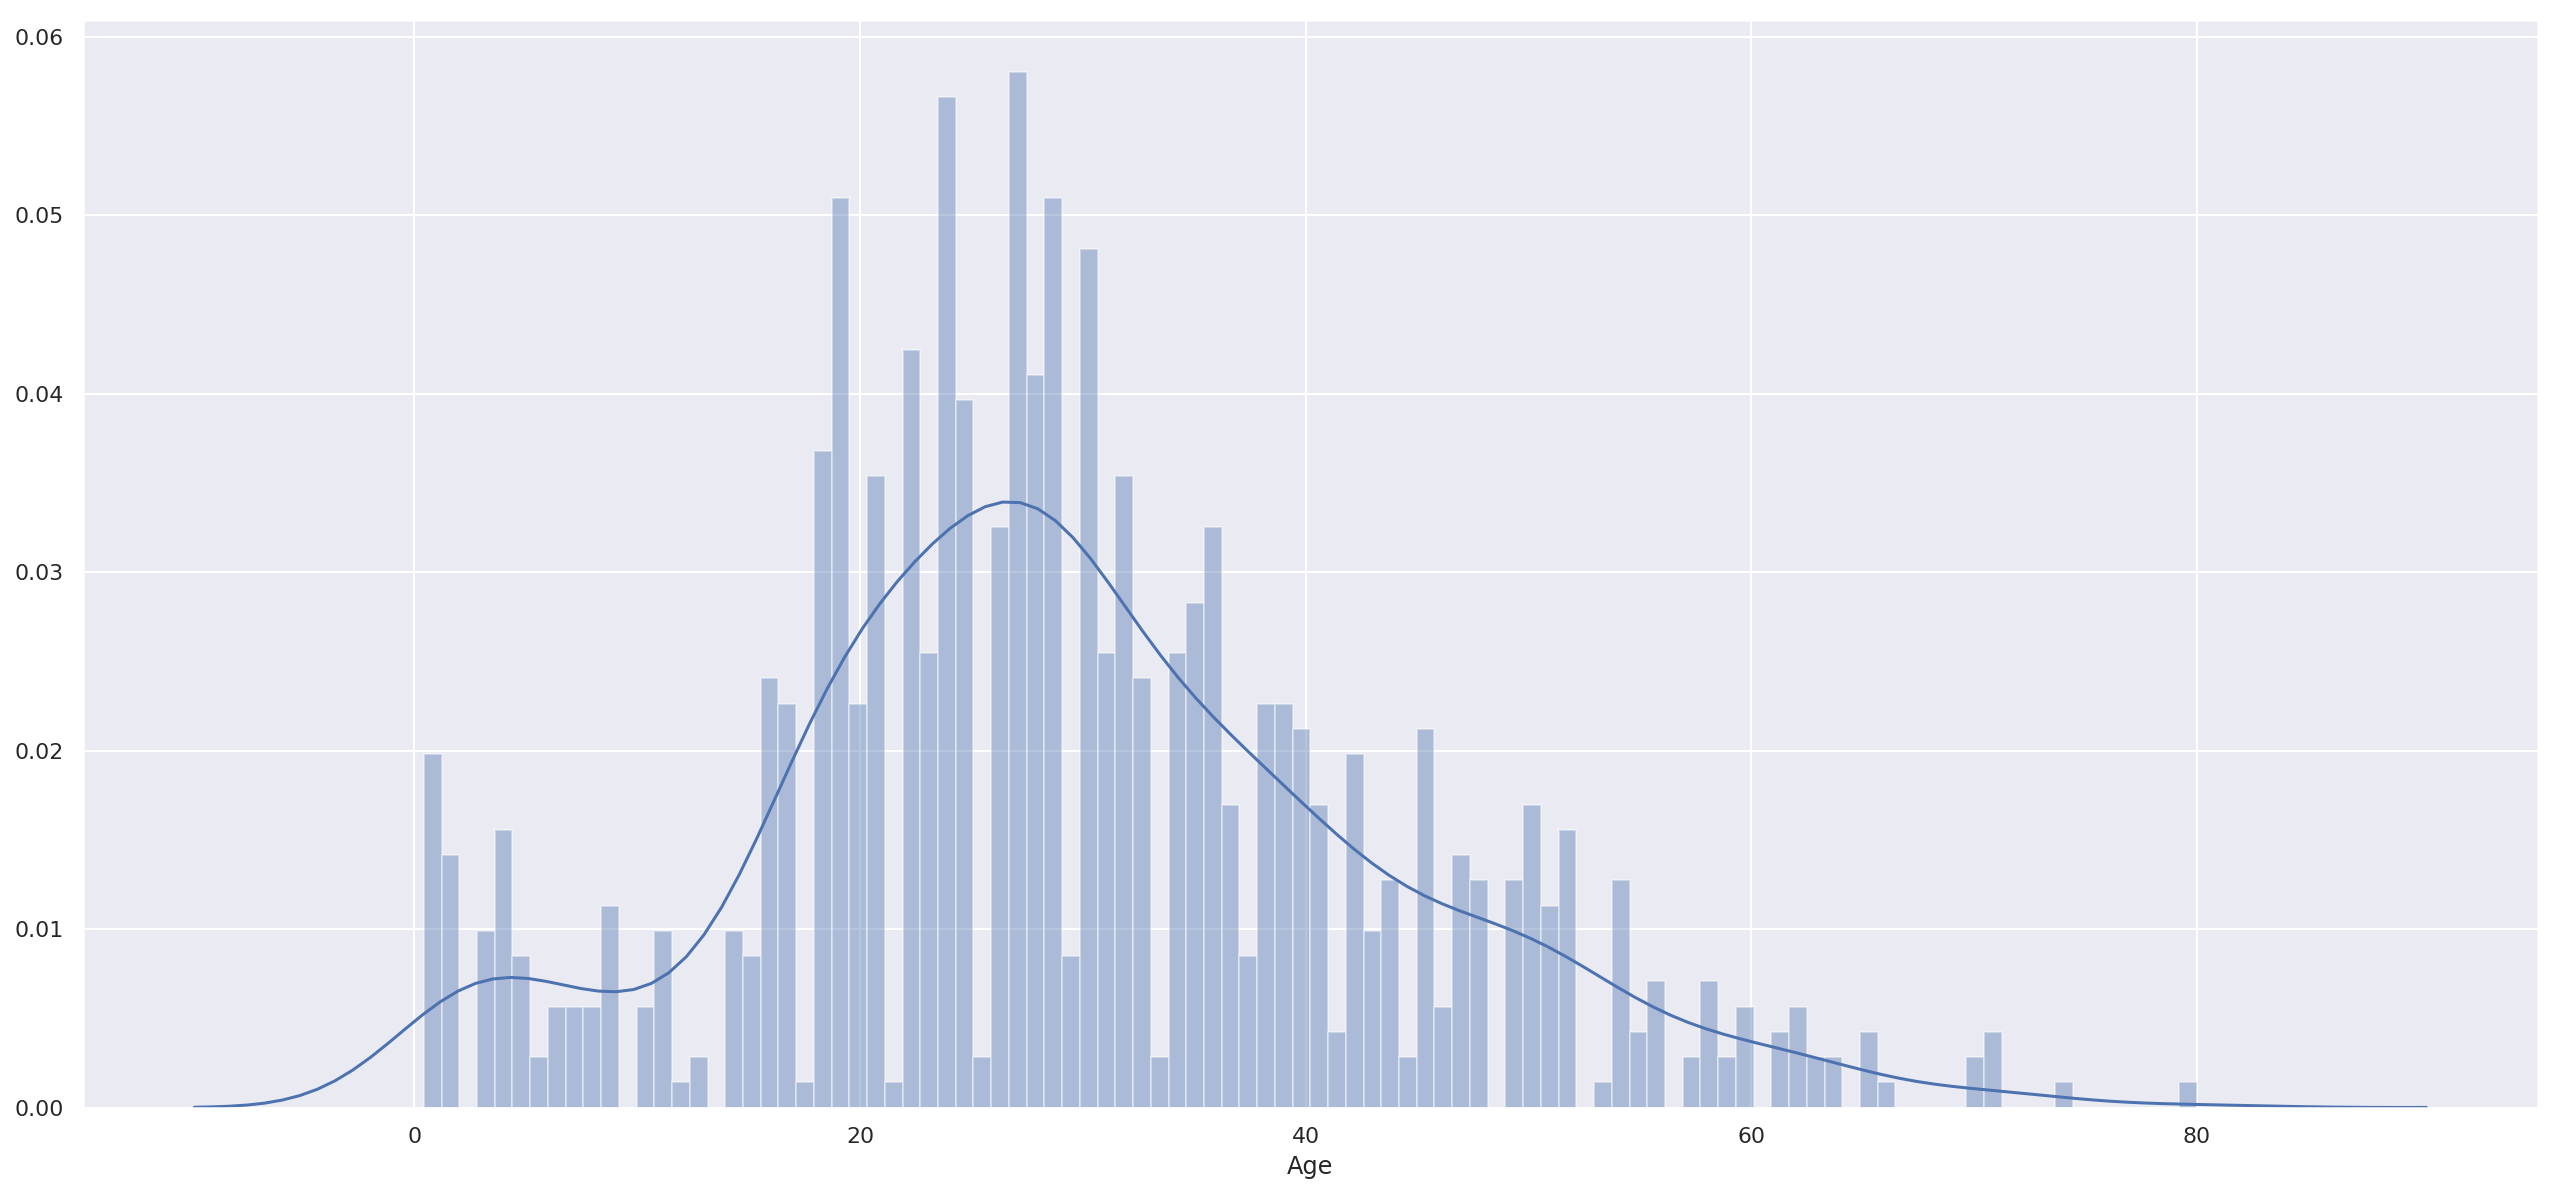

In [65]:
## Let's look at the his
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

## Age Group
We can create a new feature by grouping the "Age" column

In [66]:
## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

"train.drop('Age', axis=1, inplace=True)\ntest.drop('Age', axis=1, inplace=True)"

# Part 6: Pre-Modeling Tasks
## 6a. Separating dependent and independent variables
<a id="dependent_independent"></a>
***
Before we apply any machine learning models, It is important to separate dependent and independent variables. Our dependent variable or target variable is something that we are trying to find, and our independent variable is the features we use to find the dependent variable. The way we use machine learning algorithm in a dataset is that we train our machine learning model by specifying independent variables and dependent variable. To specify them, we need to separate them from each other, and the code below does just that.

P.S. In our test dataset, we do not have a dependent variable feature. We are to predict that using machine learning models. 

In [67]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]


#age_filled_data_nor = NuclearNormMinimization().complete(df1)
#Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)
#pd.DataFrame(zip(Data["Age"],Data_1["Age"],df["Age"]))

## 6b. Splitting the training data
<a id="split_training_data" ></a>
***
There are multiple ways of splitting data. They are...
* train_test_split.
* cross_validation. 

We have separated dependent and independent features; We have separated train and test data. So, why do we still have to split our training data? If you are curious about that, I have the answer. For this competition, when we train the machine learning algorithms, we use part of the training set usually two-thirds of the train data. Once we train our algorithm using 2/3 of the train data, we start to test our algorithms using the remaining data. If the model performs well we dump our test data in the algorithms to predict and submit the competition. The code below, basically splits the train data into 4 parts, **train_x**, **test_x**, **train_y**, **test_y**.  
* **train_x** and **train_y** first used to train the algorithm. 
* then, **test_x** is used in that trained algorithms to predict **outcomes. **
* Once we get the **outcomes**, we compare it with **test_x**

By comparing the **outcome** of the model with **test_y**, we can determine whether our algorithms are performing well or not. 

P.S. When we use cross validation it is important to remember not to use **train_x, test_x, train_y and test_y**, rather we will use **X and y**. I will discuss more on that. 

In [68]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = .33, random_state = 0)

## 6c. Feature Scaling
<a id="feature_scaling" ></a>
***
Feature scaling is an important concept of machine learning models. Often times a dataset contain features highly varying in magnitude and unit. For some machine learning models, it is not a problem. However, for many other ones, its quite a problem. Many machine learning algorithms uses euclidian distances to calculate the distance between two points, it is quite a problem. Let's again look at a the sample of the **train** dataset below.

In [69]:
train.sample()

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
80,0,22.0,1,0,0,1,9.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Here **Age** and **Calculated_fare** is much higher in magnitude compared to others machine learning features. This can create problems as many machine learning models will get confused thinking **Age** and **Calculated_fare** have higher weight than other features. Therefore, we need to do feature scaling to get a better result. 
There are multiple ways to do feature scaling. 
<ul>
    <li><b>MinMaxScaler</b>-Scales the data using the max and min values so that it fits between 0 and 1.</li>
    <li><b>StandardScaler</b>-Scales the data so that it has mean 0 and variance of 1.</li>
    <li><b>RobustScaler</b>-Scales the data similary to Standard Scaler, but makes use of the median and scales using the interquertile range so as to aviod issues with large outliers.</b>
 </ul>
I will discuss more on that in a different kernel. For now we will use <b>Standard Scaler</b> to feature scale our dataset. 

P.S. I am showing a sample of both before and after so that you can see how scaling changes the dataset. 

<h3><font color="$5831bc" face="Comic Sans MS">Before Scaling</font></h3>

In [70]:
headers = train_x.columns 

train_x.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.5000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
187,45.000000,1,0,0,1,26.5500,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
849,41.458333,0,1,0,0,44.5521,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
433,17.000000,1,0,0,1,7.1250,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
651,18.000000,0,0,1,0,11.5000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [71]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
train_x = sc.fit_transform(train_x)
## transforming "test_x"
test_x = sc.transform(test_x)

## transforming "The testset"
test = sc.transform(test)

<h3><font color="#5831bc" face="Comic Sans MS">After Scaling</font></h3>

In [72]:
pd.DataFrame(train_x, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.256749,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,-0.143592,1.775907,-0.516260,-1.102913,-0.21395,4.190764,-0.344447,-0.181779,-0.205196,-0.430847,-1.0,-0.268705,-0.471405,-0.309743,0.607177,-0.325799,-0.250224,0.873276,-0.620174,-0.30317,0.794901,-0.659380,-0.186663,2.209341,-1.084354,-0.455321,-0.30317,-0.449921,-0.246403,-0.116841,-0.309743,-0.101015,5.223573,-0.286299,-0.200699
1,1.115969,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,-0.143592,1.775907,-0.516260,-1.102913,-0.21395,-0.238620,-0.344447,-0.181779,-0.205196,2.321012,-1.0,-0.268705,-0.471405,-0.309743,0.607177,3.069373,-0.250224,-1.145113,-0.620174,-0.30317,0.794901,-0.659380,-0.186663,2.209341,-1.084354,-0.455321,-0.30317,2.222611,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.200699
2,0.863453,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,-0.143592,1.775907,-0.516260,-1.102913,-0.21395,-0.238620,2.903200,-0.181779,-0.205196,-0.430847,-1.0,-0.268705,2.121320,-0.309743,-1.646967,3.069373,-0.250224,-1.145113,-0.620174,-0.30317,-1.258018,1.516575,-0.186663,2.209341,-1.084354,-0.455321,-0.30317,2.222611,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.200699
3,-0.880395,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,-0.143592,-0.563093,-0.516260,0.906690,-0.21395,-0.238620,-0.344447,-0.181779,-0.205196,-0.430847,1.0,-0.268705,-0.471405,-0.309743,0.607177,-0.325799,-0.250224,0.873276,-0.620174,-0.30317,0.794901,-0.659380,-0.186663,-0.452624,0.922208,-0.455321,-0.30317,-0.449921,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.200699
4,-0.809096,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,-0.143592,-0.563093,1.937008,-1.102913,-0.21395,-0.238620,-0.344447,-0.181779,-0.205196,2.321012,-1.0,-0.268705,-0.471405,-0.309743,0.607177,-0.325799,-0.250224,-1.145113,1.612452,-0.30317,-1.258018,1.516575,-0.186663,-0.452624,-1.084354,2.196253,-0.30317,-0.449921,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.200699


You can see feature schaling changed the 

# Part 7: Modeling the Data
<a id="modelingthedata"></a>
***
Since the problem we are trying to solve is a classification problem, we are going to use a bunch of classification model to get the best prediction possible. I will use the following models and describe them along the way to give a better perspective. 

- Logistic Regression
- K-Nearest Neighbors(KNN)
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- Bagging on Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier



## 7a. Logistic Regression
<a id="logistic_regression"></a>
***
We will start with one of the most basic but effective machine learning model, **Logistic Regression**. Logistic regression is a famous classifier still used today frequently despite its age. It is a regression similar to **Linear regression**, yet operates as a classifier. To understand logistic regression, we should have some idea about linear regression. Let's have a look at it. 

Hopefully, we all know that any linear equation can be written in the form of...

# $$ {y} = mX + b $$

* Here, m = slope of the regression line. it represents the relationship between X and y. 
* b = y-intercept. 
* x and y are the points location in x_axis and y_axis respectively. 
<br/>

If you want to know how, check out this [video](https://www.khanacademy.org/math/algebra/two-var-linear-equations/writing-slope-intercept-equations/v/graphs-using-slope-intercept-form). So, this slope equation can also be written as...

## $$ y = \beta_0 + \beta_1 x + \epsilon \\ $$

This is the equation for a simple linear regression.
here,
* y = Dependent variable. 
* $\beta_0$ = the intercept, it is constant. 
* $\beta_1$ = Coefficient of independent variable. 
* $x$ = Indepentent variable. 
* $ \epsilon$ = error or residual. 


We use this function to predict the value of a dependent variable with the help of only one independent variable. Therefore this regression is called **Simple Linear Regression.** 

Similar to **Simple Linear Regression**, there is **Multiple Linear Regression** which can be used to predict dependent variable using multiple independent variables. Let's look at the equation for **Multiple Linear Regression**, 

## $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$


If you would like to know more about **Linear Regression** checkout this [kernel](https://www.kaggle.com/masumrumi/a-stats-analysis-and-ml-workflow-of-house-pricing). 

So, we know/reviewed a bit about linear regression, and therefore we know how to deal with data that looks like this, 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" width="600">

Here the data point's in this graph is continuous and therefore the problem is a regression one. However, what if we have data that when plotted in a scatter graph, looks like this...


In [73]:
train.calculated_fare = train.calculated_fare.astype(float)

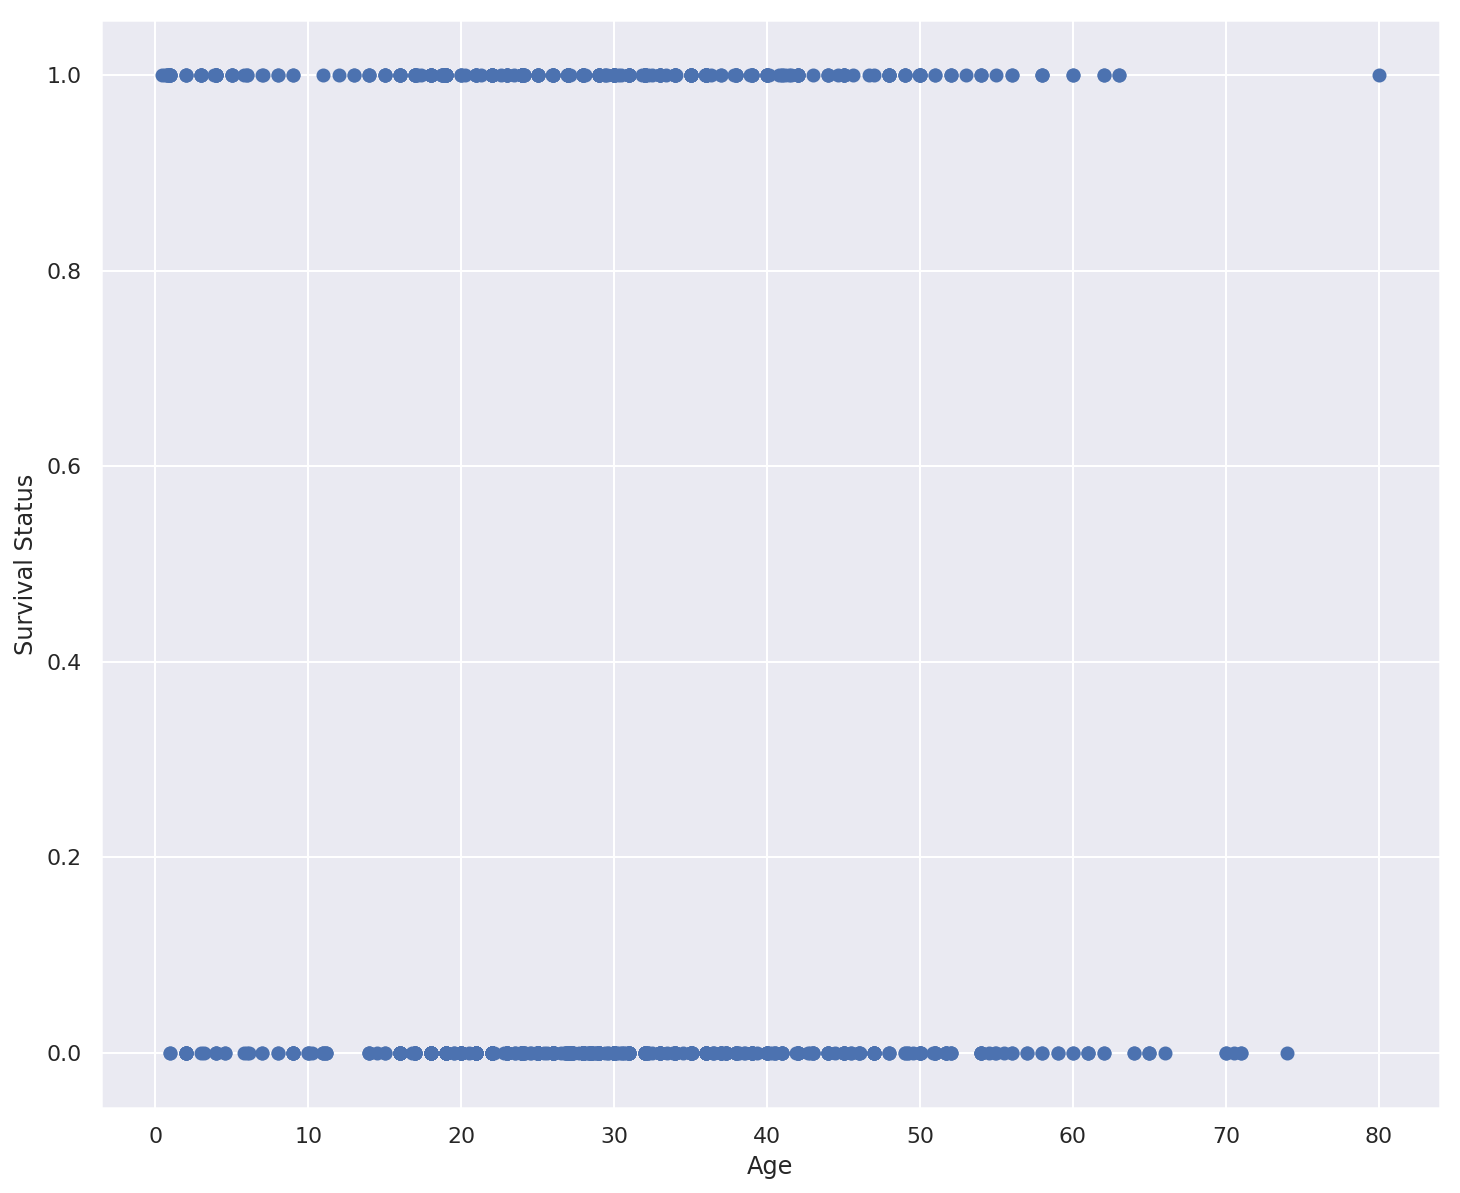

In [74]:
plt.subplots(figsize = (12,10))
plt.scatter(train.Age, train.Survived);
plt.xlabel("Age")
plt.ylabel('Survival Status');

Here the data points are not continuous; rather categorical. The two horizontal dot lines represent the survival status in the y-axis and age in the x-axis. This is probably not the best graph to explain logistic regression. For the convenience of understanding the model, let's look at a similar scatter plot with some characteristics.

<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/39_blog_image_3.png" width="600">
<h5 align="right">SuperDataScience team</h5>

This chart clearly divides the binary categorical values in the x-axis, keeping most of the 0's on the left side, and 1's on the right side. So, now that the distinction is apparent, we can use our knowledge of linear regression and come up with a regression line. So, how can we apply a regression line to explain this data?

<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/39_blog_image_4.png" width="800">
<h5 align="right">SuperDataScience team</h5>

As you can see from the chart above, The linear regression is probably not the best approach to take for categorical data. The Linear regression line barely aligns with the data points, and even if in some best-case scenario we were to use straight regression line, we would end up with a considerable error rate, which is super inconvenient. This is where logistic regression comes in. 

In [75]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear')

## fit the model with "train_x" and "train_y"
logreg.fit(train_x,train_y)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(test_x)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, test_y),4)))

So, Our accuracy Score is: 0.7993


But what is accuracy score? what does it tell us? 

Introducing <b>confusion matrix</b>. This may not seem to be much for now, but we will improve upon that. 

### Under-fitting & Over-fitting: 
So, we have our first model and its score. But, how do we make sure that our model is performing well? Our model may be overfitting or underfitting. In fact, for those of you don't know what overfitting and underfitting are. Let's find out.

![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/fittings.jpg)

As you see in the chart above. **Underfitting** is when the model fails to capture important aspects of the data and therefore introduces more bias and performs poorly. On the other hand, **Overfitting** is when the model performs too well on the training data but does poorly in the validation set or test sets.  This situation is also known as having less bias but more variation and perform poorly as well. Ideally, we want to configure a model that performs well not only in the training data but also in the test data. This is where **bias-variance tradeoff** comes in. When we have a model that overfits meaning less biased and more chance of variance, we introduce some bias in exchange of having much less variance. One particular tactic for this task is regularization models (Ridge, Lasso, Elastic Net).  These models are built to deal with the bias-variance tradeoff. This [kernel](https://www.kaggle.com/dansbecker/underfitting-and-overfitting) explains this topic well. Also, the following chart gives us a mental picture of where we want our models to be. 
![](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

Ideally, we want to pick a sweet spot where the model performs well in training set, validation set, and test set. As the model gets complex, bias decreases, variance increases. However, the most critical part is the error rates. We want our models to be at the bottom of that **U** shape where the error rate is the least. That sweet spot is also known as **Optimum Model Complexity(OMC).**

Now that we know what we want in terms of under-fitting and over-fitting, let's talk about how to combat them. 

How to combat over-fitting?
<ul>
    <li>Simplify the model by using less parameters.</li>
    <li>Simplify the model by changing the hyperparameters.</li>
    <li>Introducing regularization models. </li>
    <li>Use more training data. </li>
    <li>Gatter more data ( and gather better quality data). </li>
    </ul>

<h2><font color="#5831bc" face="Comic Sans MS">Evaluating the model</font></h2>
While we try to evaluate the model, we want to focus on a couple of things. 

<ul>
    <li>Which are the most importnat features(relatively) of a project ?(<b>Relative Feature Importance</b>)</li>
    <li>Which features have the biggest impact on the project on the project success ? (<b>Permutation Importance</b>) </li>
    <li>How does changes in those featues affact the project success? (<b>Partial Dependencies</b>)</li>
    <li>Digging deeper into the decisions made by the model(<b>SHAP values</b>)
</ul>

<h3>Explaining the results of the model.</h3>
<ul>
    <li>How well is the model ?</li>
    <li>What are the most important features ?</li>
</ul>

<h3>Introducting Confusion Matrix</h3>
A confusion Matrix is a table that <b>describes the performance of a classification model</b>. We use the classification model by using data where we already know the true outcome and compare it with the model predicted an outcome. Confusion Matrix tells us how many our model predicted correctly and incorrectly in terms of binary/multiple outcome classes. For example, in terms of this dataset, our model is trying to classify whether the passenger survived or died. We will come back to this; for now, let's introduce ourselves some of the terminologies of the confusion matrix. 


<ul style="list-style-type:square;">
    <li>True Positive</li>
    <li>True Negative</li>
    <li>False Positive</li>
    <li>False Negative</li>
</ul>
 
 #### This part of the kernel is a working progress. Please check back again for future updates.####
 
 Resources: 
 * [Confusion Matrix](https://www.youtube.com/watch?v=8Oog7TXHvFY)

<h1>AUC & ROC Curve</h1>

0.8352407165966488


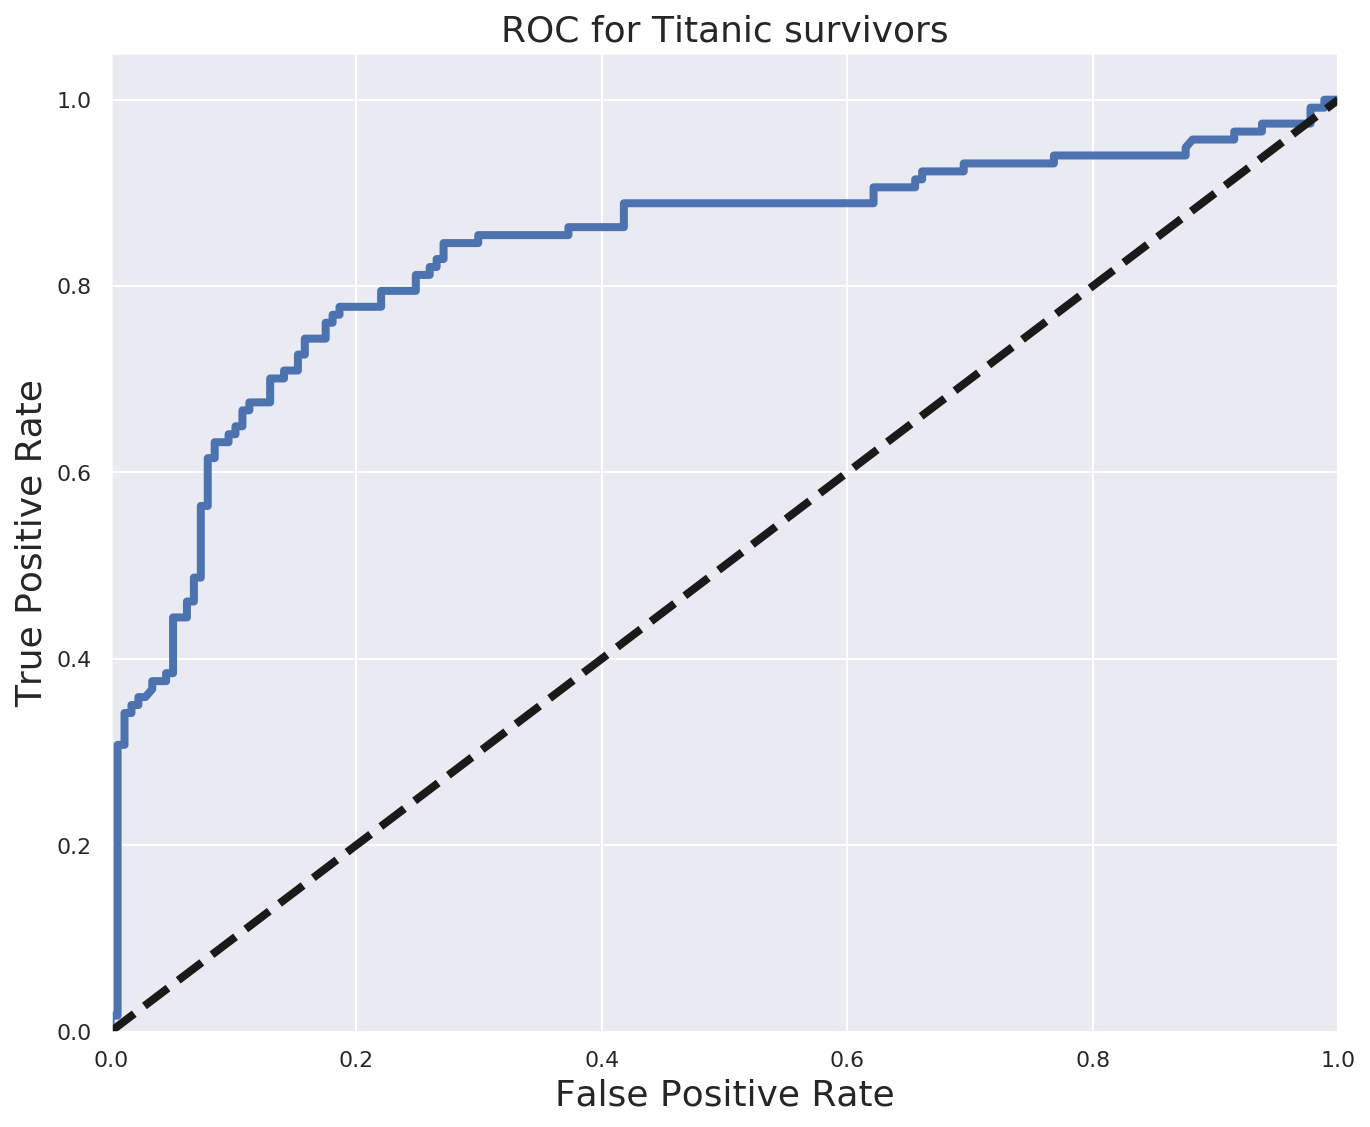

In [76]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(test_x)

FPR, TPR, _ = roc_curve(test_y, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

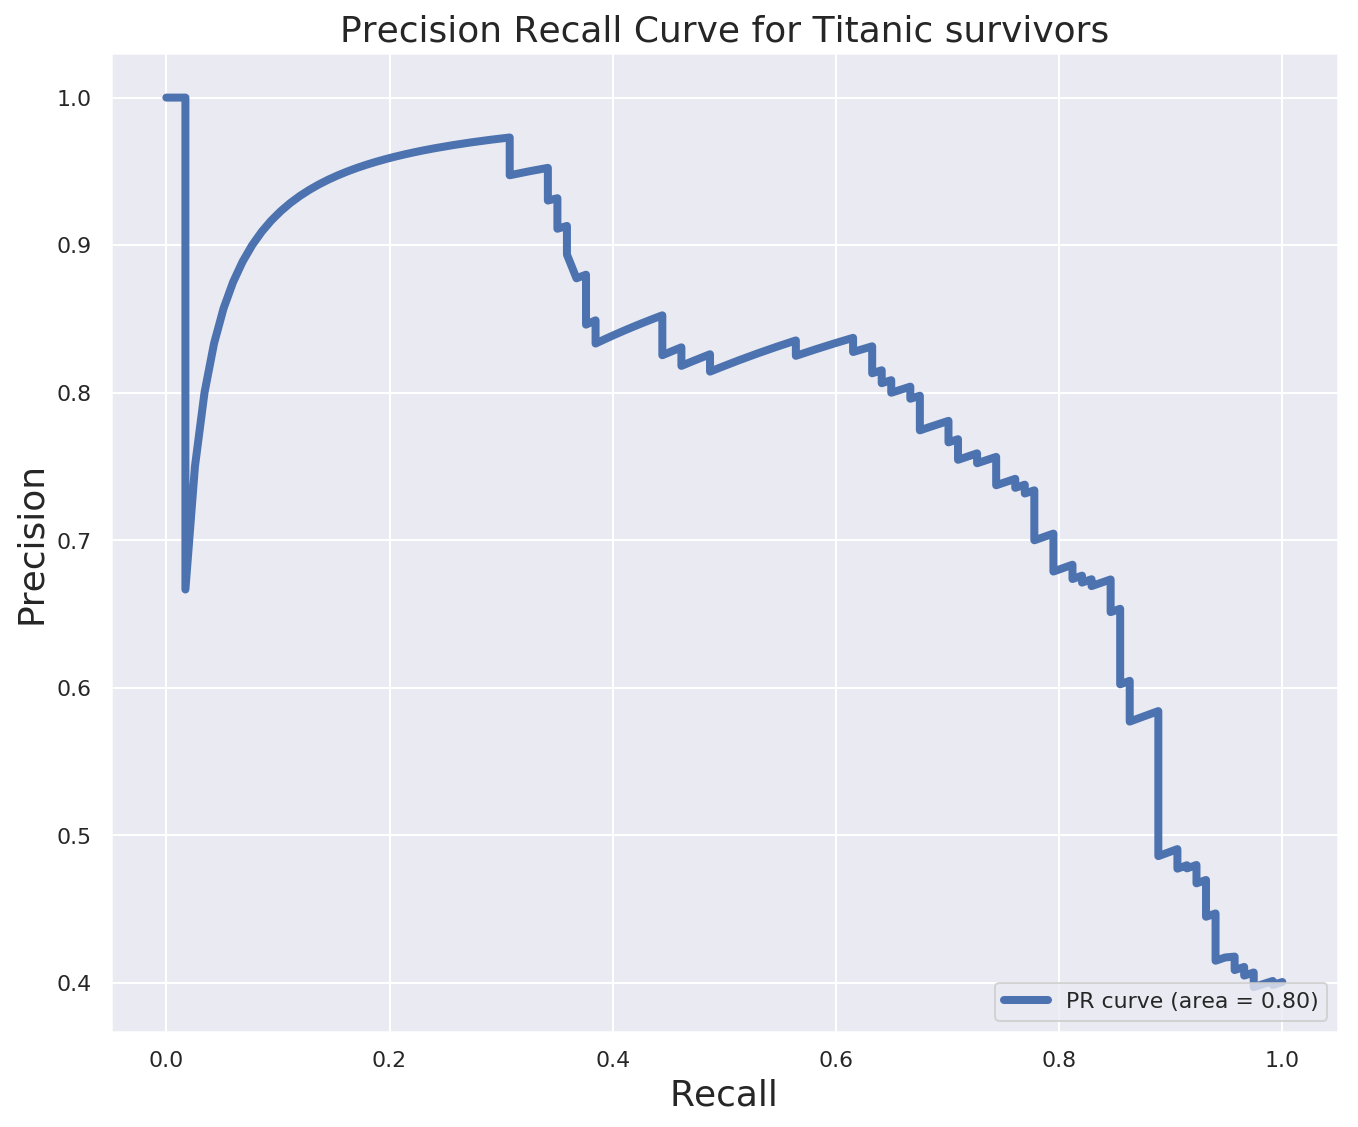

In [77]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(test_x)

precision, recall, _ = precision_recall_curve(test_y, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Using Cross-validation:
Pros: 
* Helps reduce variance. 
* Expends models predictability. 


In [78]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.
X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.81531532 0.84684685 0.81081081 0.84684685 0.82882883 0.82432432
 0.8018018  0.85585586 0.82432432 0.81981982]
Mean Cross-Validation accuracy score: 0.82748


## Grid Search on Logistic Regression
* What is grid search? 
* What are the pros and cons?

**Gridsearch** is a simple concept but effective technique in Machine Learning. The word **GridSearch** stands for the fact that we are searching for optimal parameter/parameters over a "grid." These optimal parameters are also known as **Hyperparameters**. **The Hyperparameters are model parameters that are set before fitting the model and determine the behavior of the model.**. For example, when we choose to use linear regression, we may decide to add a penalty to the loss function such as Ridge or Lasso. These penalties require specific alpha (the strength of the regularization technique) to set beforehand. The higher the value of alpha, the more penalty is being added. GridSearch finds the optimal value of alpha among a range of values provided by us, and then we go on and use that optimal value to fit the model and get sweet results. It is essential to understand those model parameters are different from models outcomes, for example, **coefficients** or model evaluation metrics such as **accuracy score** or **mean squared error**.

#### This part of the kernel is a working progress. Please check back again for future updates.####

In [79]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)



0.8175675675675675
{'C': 9, 'penalty': 'l1'}
LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)



#### Using the best parameters from the grid-search. 

In [81]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8412162162162162

## 7b. K-Nearest Neighbor classifier(KNN)
<a id="knn"></a>
***

In [82]:
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.81531532 0.80630631 0.78378378 0.8018018  0.81531532 0.81081081
 0.79279279 0.79279279 0.76576577 0.82432432]
Mean Cross-Validation accuracy score: 0.801


#### Manually find the best possible k value for KNN

In [83]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))


Accuracy scores are: [0.7504504504504504, 0.7783783783783784, 0.7927927927927927, 0.7869369369369368, 0.8009009009009009, 0.8013513513513514, 0.7977477477477477, 0.7945945945945947, 0.8018018018018017, 0.7918918918918919, 0.7981981981981983, 0.7909909909909911, 0.7968468468468468, 0.7927927927927927, 0.8009009009009007, 0.7842342342342342, 0.7891891891891892, 0.7783783783783784, 0.7887387387387388, 0.7815315315315315, 0.786936936936937, 0.7765765765765766, 0.7846846846846847, 0.7734234234234234, 0.777027027027027, 0.7644144144144145, 0.768018018018018, 0.7603603603603604, 0.7635135135135136, 0.754954954954955]

Mean accuracy score: 0.7836186186186185


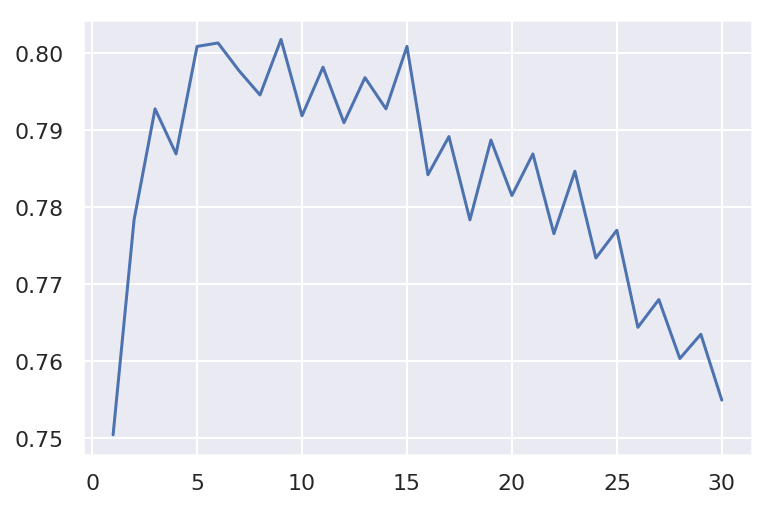

In [84]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

### Grid search on KNN classifier

In [85]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [86]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)


0.8067415730337079
{'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


#### Using best estimator from grid search using KNN. 

In [87]:
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score(X,y)

0.8536036036036037

#### Using RandomizedSearchCV
Randomized search is a close cousin of grid search. It doesn't  always provide the best result but its fast. 

In [88]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(X,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
          error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=40, n_jobs=-1,
          param_distributions={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=False)

In [89]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8067415730337079
{'weights': 'uniform', 'n_neighbors': 7}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


In [90]:
### Using the best parameters from the grid-search.
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X,y)

0.8536036036036037

## 7c. Gaussian Naive Bayes
<a id="gaussian_naive"></a>
***

In [91]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(test_x)
gaussian_accy = round(accuracy_score(y_pred, test_y), 3)
print(gaussian_accy)

0.789


## 7d. Support Vector Machines(SVM)
<a id="svm"></a>
***

In [92]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8453183520599251
{'C': 2, 'gamma': 0.001}
SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [94]:
# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.score(X,y)

0.8265765765765766

## 7e. Decision Tree Classifier
<a id="decision_tree"></a>
***

Among all the machine learning models decision tree is one of my favorite. Let's briefly talk about it. 

The idea behind the decision tree is pretty simple. To build a tree, we use a decision tree algorithm called CART. CART stands for Classification and Regression Trees. This means the decision tree can be used for both regression and classifications problems. To perform classification or regression, decision trees make sequential, hierarchical decisions about the outcome variable based on the predictor data.

Decision tree works by breaking down the dataset into small subsets. This breaking down process is done by asking questions about the features of the datasets. The idea is to unmix the labels by asking fewer questions necessary. As we ask questions, we are breaking down the dataset into more subsets. Once we have a subgroup with only the unique type of labels, we end the tree in that node. We call this the leaf node. Here is an excellent example of the decision tree. 

<img src="https://cdn-images-1.medium.com/max/1200/1*GgUEazXbr2CYLUsPgdYzDw.png" width="600">

If you think about it, this is sort of like the "20 Questions" game where an individual or group has the opportunity to identify an unknown object by asking a series of up to 20 "yes" or "no" questions. For example, if we want to tie it with this dataset, let's say we are asking to find out whether a certain person in the test dataset survived or not. We may ask a question like, is the person "male" or "female." Let's say the answer is "female." Then the algorithm might ask about the person's Pclass. Let's say the Pclass is 1.

As you can see by inquiring these details about this person we can give a certain percentage with confidence about a person's survival status. If you want to know more how the decision tree does all these mathematically and technically,  you can keep on reading. Otherwise, you can skip to the next section. 

At first, we will add a root node for the tree. All node receives a list of rows from the dataset.  The root node receives the whole dataset.  This node then asks true/false questions about one of the features. Based on the answer, we split the dataset into smaller subsets. The number of subsets depends on the unique values of that feature. These subsets then become the input of each child nodes. Each child node then asks another question about a different feature leading to break down further into more subgroups. This process goes on. As we keep reading, one questions beg to be answered. How do we know which questions to ask and when? 

<b>The trick to building an effective tree is to know which questions to ask and when.</b> To find the best possible questions, we need to quantify how much uncertainty is there in a single node and how much a question help to unmix the labels. We can find out how much uncertainty/impurity is there in a single node using a concept called <i>Gini Impurity</i>. We can find out how much a question reduces that uncertainty using a matrix called <i>Information gain.</i> These two combined helps us decide which question to ask in each node. Let's dive into how these are calculated.

<h3>Gini Impurity:</h3>
Gini Impurity ranges between 0 and 1, where a lower value indicates less uncertainty and a higher value indicates higher uncertainty. In other words, when we look at the Gini index we want to look the at the lower value of Gini Index as those are the once produced the most unmixed subsets. A really good video about calculating Gini index is [here](https://www.youtube.com/watch?v=7VeUPuFGJHk). 

gini impurity quantifies our chances of being incorrect if we randomly assign a label to an example in the same set. For example, Let's say there are 5 different mixes with five different labels, Our chance of being right is 1/5. So, our chances of being wrong is (1-1/5) = 0.8. So, 0.8 is our Gini Impurity score. 

Here is the equation for Gini score. 

### $$ \text{Gini} = \sum_{i=1}^{classes} p(i\;|\;t)(1 -p(i\;|\;t)) = 1 - \sum_{i=1}^{classes} p(i\;|\;t)^2 $$


#### This part of the kernel is a working progress. Please check back again for future updates.#### 


<h3>Information Gain</h3>
Information gain is basically difference between the Gini Index of the parent note and the <b>weighted</b> average of the child nodes.



<h4>Resources for Decision Tree:</h4> 
* https://www.youtube.com/watch?v=LDRbO9a6XPU (decision tree)
* https://www.udemy.com/machinelearning/learn/v4/t/lecture/5732730?start=8 (Super data science)
* GA resources. 
* https://www.youtube.com/watch?v=AmCV4g7_-QM&list=PLBv09BD7ez_4temBw7vLA19p3tdQH6FYO&index=3 (playlist of the Decision tree)
* https://www.youtube.com/watch?v=7VeUPuFGJHk(How to calculate Gini Index)






### Grid search on Decision Tree


In [95]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30, 'auto'], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [96]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 28}
0.838963963963964
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=28, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [97]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

0.8468468468468469

Let's look at a visual dectree. 

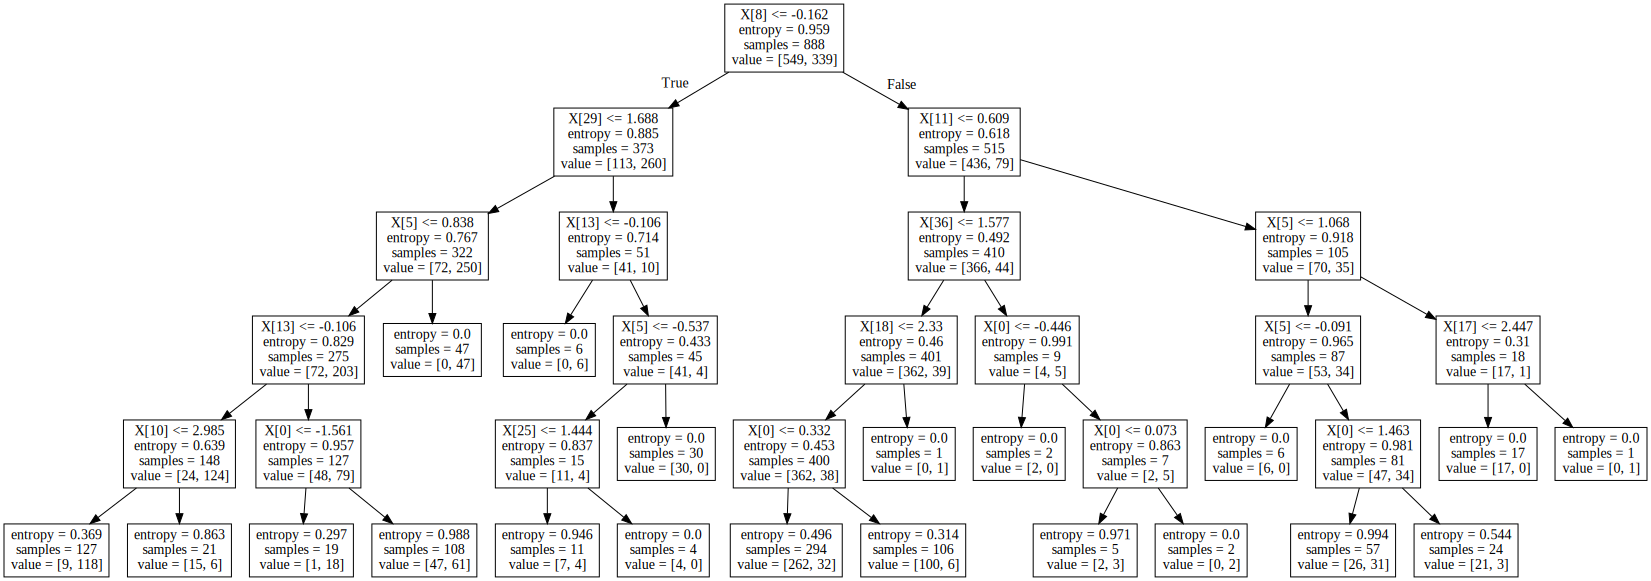

In [98]:
import graphviz

from sklearn import tree

dot_data = tree.export_graphviz(dectree_grid, out_file=None)

graph = graphviz.Source(dot_data)

graph.render("house")

graph

## 7f. Bagging Classifier
<a id="bagging"></a>
***

In [99]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X, y)
y_pred = BaggingClassifier.predict(test_x)
bagging_accy = round(accuracy_score(y_pred, test_y), 3)
print(bagging_accy)

0.905


## 7g. Random Forest Classifier
<a id="random_forest"></a>

In [100]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [90,95,100,105,110]
max_depth = range(1,30)
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators, 
         'max_depth':max_depth, 
        }
grid = GridSearchCV(RandomForestClassifier(),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [90, 95, 100, 105, 110], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8449438202247191
{'max_depth': 5, 'n_estimators': 90}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [102]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.8490990990990991

## 7h. Gradient Boosting Classifier
<a id="gradient_boosting"></a>
***

In [103]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(X, y)
y_pred = gradient.predict(test_x)
gradient_accy = round(accuracy_score(y_pred, test_y), 3)
print(gradient_accy)

0.874


## 7i. XGBClassifier
<a id="XGBClassifier"></a>
***

In [104]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(test_x)
XGBClassifier_accy = round(accuracy_score(y_pred, test_y), 3)
print(XGBClassifier_accy)

0.85


## 7j. AdaBoost Classifier
<a id="adaboost"></a>
***

In [105]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X, y)
y_pred = adaboost.predict(test_x)
adaboost_accy = round(accuracy_score(y_pred, test_y), 3)
print(adaboost_accy)


0.83


## 7k. Extra Trees Classifier
<a id="extra_tree"></a>
***

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(test_x)
extraTree_accy = round(accuracy_score(y_pred, test_y), 3)
print(extraTree_accy)


0.969


## 7l. Gaussian Process Classifier
<a id="GaussianProcessClassifier"></a>
***

In [107]:
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(test_x)
gau_pro_accy = round(accuracy_score(y_pred, test_y), 3)
print(gau_pro_accy)

0.925


## 7m. Voting Classifier
<a id="voting_classifer"></a>
***

In [108]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('logreg_grid', logreg_grid),
    ('svc', svm_grid),
    ('random_forest', rf_grid),
    ('gradient_boosting', gradient),
    ('decision_tree_grid',dectree_grid),
    ('knn_grid', knn_grid),
    ('XGB Classifier', XGBClassifier),
    ('BaggingClassifier', BaggingClassifier),
    ('ExtraTreesClassifier', ExtraTreesClassifier),
    ('gaussian',gaussian),
    ('gaussian process classifier', GaussianProcessClassifier)], voting='soft')

voting_classifier = voting_classifier.fit(train_x,train_y)

In [109]:
y_pred = voting_classifier.predict(test_x)
voting_accy = round(accuracy_score(y_pred, test_y), 3)
print(voting_accy)

0.823


In [110]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Gradient Boosting Classifier', 'Voting Classifier', 'XGB Classifier','ExtraTrees Classifier','Bagging Classifier'],
    'Score': [svc_accy, knn_accy, logreg_accy, 
              random_accy, gaussian_accy, dectree_accy,
               gradient_accy, voting_accy, XGBClassifier_accy, extraTree_accy, bagging_accy]})
models.sort_values(by='Score', ascending=False)

NameError: name 'svc_accy' is not defined

# Part 8: Submit test predictions
<a id="submit_predictions"></a>
***

In [111]:
all_models = [GaussianProcessClassifier, gaussian, ExtraTreesClassifier, BaggingClassifier, XGBClassifier,knn_grid,  dectree_grid, gradient, rf_grid, svm_grid, logreg_grid, voting_classifier  ]

c = {}
for i in all_models:
    a = i.predict(test_x)
    b = accuracy_score(a, test_y)
    c[i] = b
    


In [112]:
test_prediction = (max(c, key=c.get)).predict(test)
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

# Credits

* To [Brandon Foltz](https://(www.youtube.com/channel/UCFrjdcImgcQVyFbK04MBEhA) for being a fantastic statistics teacher. Love all those inspirational intro's. 
* To [Khan Academy](https://www.khanacademy.org), Amazing place to keep track of my mathematics journey. 
* To [General Assambly](https://generalassemb.ly); Where I started my data science journey. 
* To [Corey Schafer](https://www.youtube.com/channel/UCCezIgC97PvUuR4_gbFUs5g); Corey explains programming terms incredibly well. To the newcomers, I say you check out his style of teaching.

# Resources
Here are some of the links I found helpful while writing this kernel. I do not assume them to be great articles; neither do I recommend them. I mentioned them because I have found them to be helpful. 

## Statistics
* [What Is a t-test? And Why Is It Like Telling a Kid to Clean Up that Mess in the Kitchen?](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen)
* [What Are T Values and P Values in Statistics?](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics)
* [What is p-value? How we decide on our confidence level.](https://www.youtube.com/watch?v=E4KCfcVwzyw)



***

If you like to discuss any other projects or have a chat about data science topics, I'll be more than happy to connect with you on:

**LinkedIn:** https://www.linkedin.com/in/masumrumi/ 

**My Website:** http://masumrumi.com/ 

*** This kernel is a work in progress like all of my other notebooks. I will always incorporate new concepts of data science as I master them. This journey of learning is worth sharing as well as collaborating. Therefore any comments about further improvements would be genuinely appreciated.***
***
## If you have come this far, Congratulations!!

## If this notebook helped you in any way, please upvote!!

